# EDA

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# Introduccion

En este estudio exploratorio de datos (EDA, por sus siglas en inglés), se analizarán cuatro conjuntos de datos relacionados con cursos en línea de diferentes plataformas educativas. Los conjuntos de datos a analizar son los siguientes:

    Coursera_courses.csv: Este archivo contiene información sobre cursos ofrecidos en la plataforma Coursera. 

    Coursera_reviews.csv: Este conjunto de datos contiene reseñas y comentarios dejados por los estudiantes sobre los cursos de Coursera. 

    edx_courses.csv: Este archivo proporciona información sobre los cursos ofrecidos en la plataforma edX. Contiene detalles similares a Coursera_courses.csv.

    udemy_courses.csv: Este conjunto de datos contiene información sobre cursos de la plataforma Udemy.

El objetivo de este análisis es explorar los conjuntos de datos, realizar visualizaciones y extraer información relevante sobre los cursos en línea de estas plataformas educativas. Para ello, se utilizarán las bibliotecas de Python, como pandas para la manipulación de datos, matplotlib y seaborn para la visualización de gráficos, numpy para operaciones numéricas y wordcloud para crear nubes de palabras. Cada conjunto de datos tendrá su analisis independiente.

## Analisis coursera_courses.csv

In [2]:
df = pd.read_csv('datasets/Coursera_courses.csv')

In [3]:
df.shape

(623, 4)

En Coursera_course tenemos 623 filas y 4 columnas. Es un df relativamente pequeño.

In [4]:
df.columns

Index(['name', 'institution', 'course_url', 'course_id'], dtype='object')

Las columnas de este dataframe son:

- name
- institution
- course_url
- course_id

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


Todas las columnas son del tipo de dato object, lo cual implica que muy probablemente todas contengan strings, revisemos generalmente el df

In [6]:
df.head(10)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
5,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,financial-markets-global
6,Introduction to Psychology,Yale University,https://www.coursera.org/learn/introduction-ps...,introduction-psychology
7,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,python
8,The Bits and Bytes of Computer Networking,Google,https://www.coursera.org/learn/computer-networ...,computer-networking
9,AI For Everyone,DeepLearning.AI,https://www.coursera.org/learn/ai-for-everyone,ai-for-everyone


Aparentemente, al menos en las 10 primeras filas, el dataframe solo contiene strings, por lo que sus variables son del tipo cualitativas polinomicas. Comprobemos si tiene datos nulos, unicos o repetidos

In [7]:
df.describe()

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


#### En general, se puede observar que no hay datos nulos y/o faltantes, y por columna podemos observar:
    

- name:

    Todos sus datos son unicos excepto uno, que sería el string 'Introduction to Psychology' que se repite 2 veces.


- institution:

     Tiene varios datos repetidos, el dato más repetido es 'University of Pennsylvania' con una frecuencia de 43. Ya revisaremos la frecuencia de los demas datos de la columna


- course_url y course_id:

    Todos sus datos son unicos

#### Frecuencia de los datos en la columna institution:

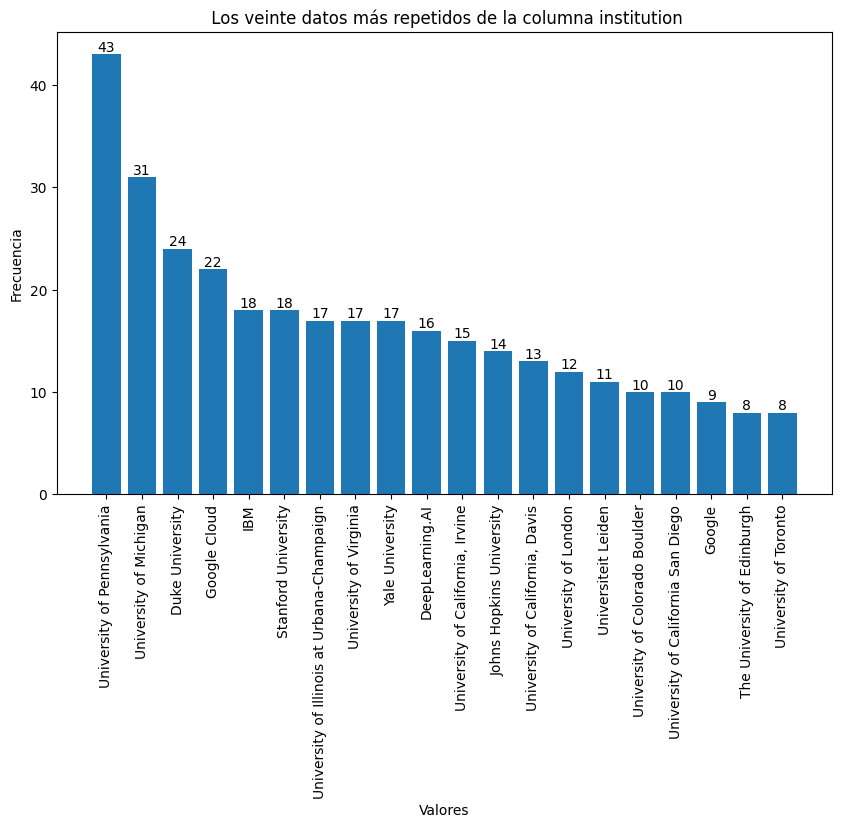

In [8]:

# Filtrar las columnas con valores nulos mayores a cero
frecuencia = df.institution.value_counts().head(20)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(' Los veinte datos más repetidos de la columna institution')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

Hay varias universidades que se repiten, por lo que estas deben de tener mas de un curso subido a la plataforma de coursera

## Analisis coursera_reviews.csv

In [32]:
df = pd.read_csv('datasets/Coursera_reviews.csv')

In [10]:
df.shape

(1454711, 5)

El dataframe contiene 1454711 filas y 5 columnas

In [11]:
df.columns

Index(['reviews', 'reviewers', 'date_reviews', 'rating', 'course_id'], dtype='object')

El nombre de las columnas son:

- reviews
- reviewers
- date_reviews
- rating
- course_id

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454558 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


Las columnas reviews, reviewers, date_reviews, course_id  son del tipo de dato object, lo cual implica que muy probablemente todas contengan strings; y la columna rating, es del tipo int, osea que contiene valores numericos enteros; también podemos observar que de 1454711 datos totales, la columna reviews le hacen faltan datos, para ser exactos, 153 datos que pueden ser datos faltantes o directamente nulos. 

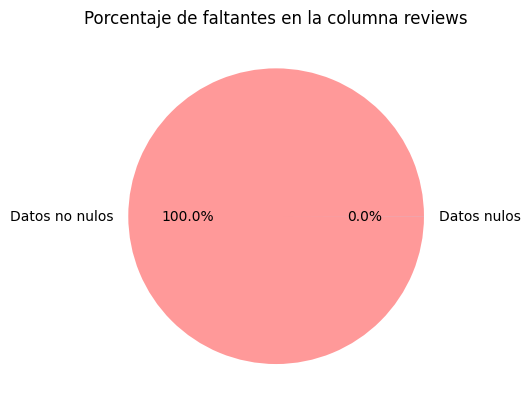

In [13]:
cantidad_datos_reviews = df.reviews.count()
values = [cantidad_datos_reviews, df.shape[0]-cantidad_datos_reviews ]
labels = ['Datos no nulos', 'Datos nulos']
colors = ['#ff9999', '#66b3ff']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de faltantes en la columna reviews')

plt.show()

A pesar de haber 153 datos nulos/faltantes, en porcentaje no significan nada por ser una muy pequeña parte de la cantidad total de datos, por lo que se podrían obviar del dataframe y no debería afectar el resultado de un analisis o modelado posterior hecho con estos datos.

Miremos el dataframe de forma general:

In [14]:
df.head(10)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
5,Some of the quizzes contained material not exp...,By Daniel F,"Dec 23, 2019",4,google-cbrs-cpi-training
6,Solid presentation all the way through. I real...,By Logan D,"Sep 03, 2020",5,google-cbrs-cpi-training
7,Probably the best certification course I've ta...,By Luis M C,"Nov 21, 2019",5,google-cbrs-cpi-training
8,The ProctorU.com system took 2 times the amoun...,By scott w,"Sep 28, 2020",5,google-cbrs-cpi-training
9,Covered all of the required information in an ...,By Ryan H,"Aug 26, 2019",5,google-cbrs-cpi-training


Se puede ver que efectivamente que las columnas reviews, reviewers, date_reviews, course_id, contienen string, por lo que son variables cualitativas polinomicas y la columna rating al tener numeros no decimales, es una variable cuantitativa discreta. Observemos el comportamiento de las variables:

In [15]:
df.value_counts().describe()

count    519886.000000
mean          2.797840
std           0.599093
min           1.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: count, dtype: float64

Se puede observar que la columna rating, los percentiles son iguales al valor máximo, significa que todos los valores en la distribución son menores o iguales al máximo, lo cual indica que el máximo valor es extremadamente inusual en comparación con el resto de los datos. Esto podría ser indicativo de la presencia de valores atípicos o anomalías en los datos, por lo que se debe hacer una analisis más profundo de estos datos.

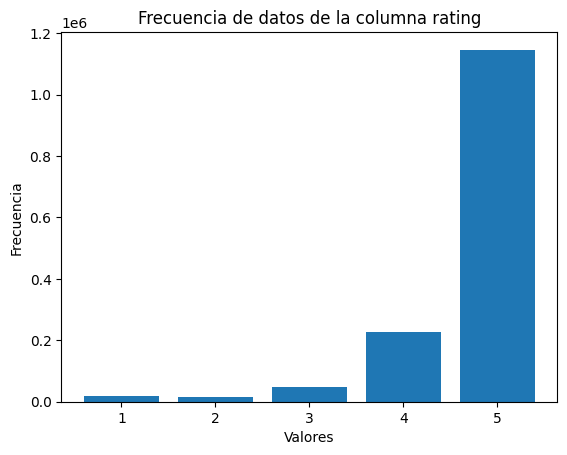

In [9]:
frecuencia = df['rating'].value_counts()

plt.bar(frecuencia.index, frecuencia.values)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de datos de la columna rating')

plt.show()

Efectivamente, los datos están sesagados a la derecha, pero esto no implica que hayan valores atipicos, si tenemos en cuenta el contexto de la columna, los valores se deben a la puntuación que le dan los usuarios a los cursos de coursera, y que la mayoría estén en 5, muestra que los cursos han sido sobresalientes para la mayoría de los usuarios (si consideramos que la puntuación de 5 es la mejor)

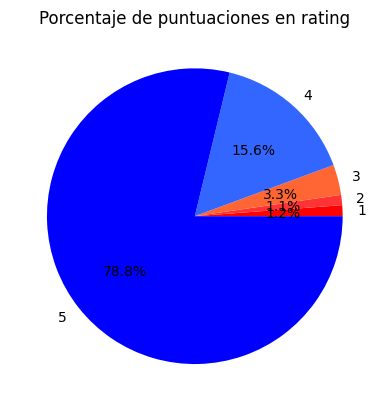

In [17]:
cantidad_datos_rating = df.rating.value_counts()
values = [cantidad_datos_rating[1],cantidad_datos_rating[2],cantidad_datos_rating[3],cantidad_datos_rating[4],cantidad_datos_rating[5] ]
labels = ['1', '2','3','4','5']
colors = ['#FF0000', '#FF3333','#FF6633', '#3366FF','#0000FF']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de puntuaciones en rating')

plt.show()

Observemos el comportamiento de las variables cualitativas:

In [19]:
df.describe(include=['O'])

,reviews,reviewers,date_reviews,course_id
count,1454558,1454711,1454711,1454711
unique,458276,287808,1892,604
top,good,By Deleted A,"May 25, 2020",python
freq,8827,5412,5394,45218


De esta tabla podemos observar lo siguiente de cada columna:



#### Reviews:



    - Esta columna le faltan de datos, pues solo contiene 1454558 de 1454711, algo que ya habíamos analizado anteriormente.
    - Que de los datos disponibles, 458276 datos son valores unicos, osea:

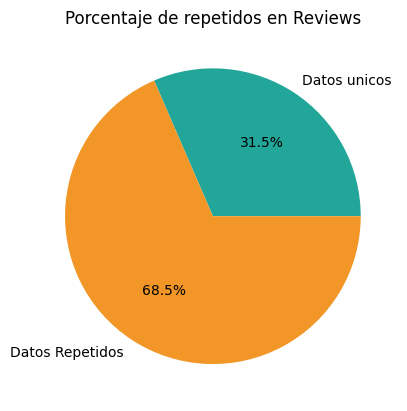

In [20]:
cantidad_unicos_review = len(df.reviews.unique())
values = [cantidad_unicos_review,(~df.reviews.isnull()).sum()-cantidad_unicos_review ]
labels = ['Datos unicos', 'Datos Repetidos']
colors = ['#22A699' ,'#F29727']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de repetidos en Reviews')

plt.show()

  
    - En la columna Reviews, un 31.5% (458276) son datos unicos, y el 68.5% (996568) datos restantes, son datos repetidos
    - El dato con mayor frecuencia es "good", con una frecuencia de 8827

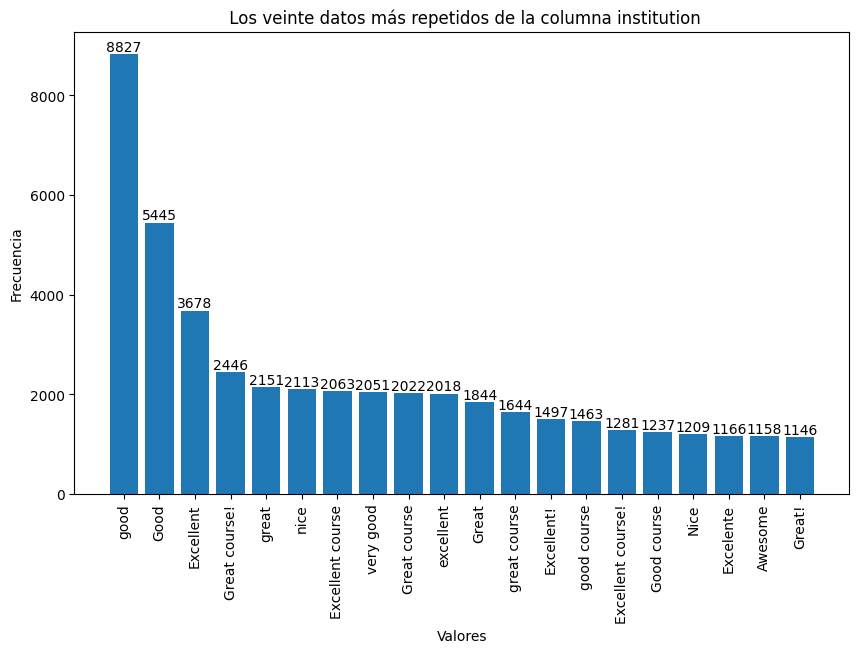

In [21]:
# Filtrar las columnas con valores nulos mayores a cero
frecuencia = df.reviews.value_counts().head(20)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(' Los veinte datos más repetidos de la columna reviews')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

    - Nos encontramos con algo interesante y es que, entre las reviews, tenemos las reviews "good" y "Good", que son la misma palabra pero con mayuscula inicial, por lo que procederé a volver las palabras en minusculas para generalizar resultados.

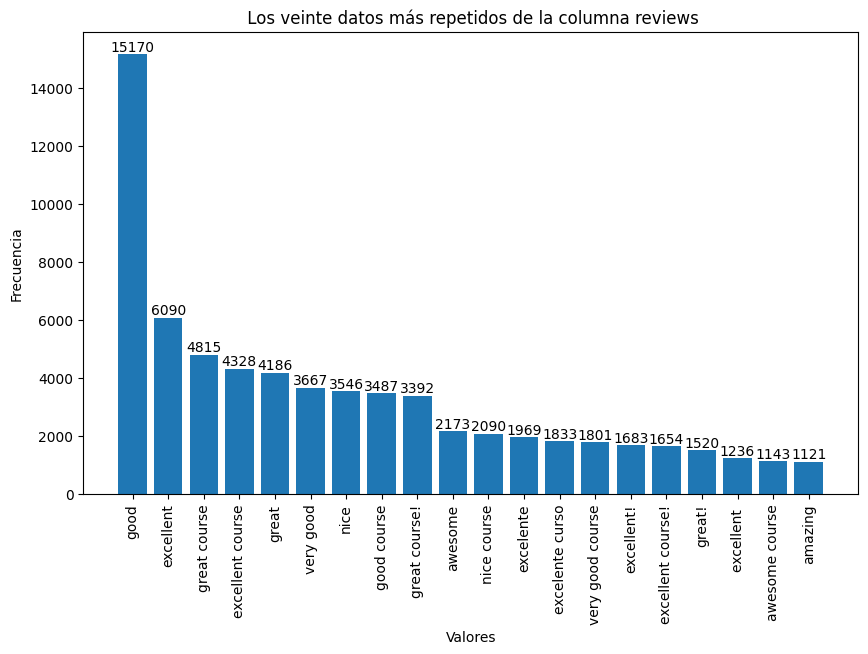

In [29]:
frecuencia = df.reviews.apply(lambda x:str(x).lower()).value_counts().head(20)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(' Los veinte datos más repetidos de la columna reviews')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

    - Al haber convertido todos los datos de la columna reviews en minusculas, podemos ver una agrupación de datos aún más general, pero podemos observar que hay palabras iguales pero con signos de exclamación, la palabra course/curso como acompañante y las mismas palabras pero en distintos idiomas, lo que podría ocasionar problemas de modelación si se desea usar esta información. Cambiemos el enfoque de la observación, y miremos qué palabras se repiten más con una nube de palabras:


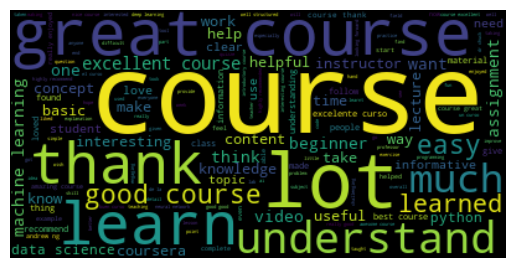

In [33]:
data = df.reviews.apply(lambda x: str(x).lower())
texto = " ".join(i for i in data)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords).generate(texto)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

    - En esta oportunidad, podemos ver como la palabra más repetida en "course", pero hay algo curioso que es que se repite varias veces dentro de la nube de palabras, lo que puede significar que hay frases/oraciones con varios "course" en ellos en diferentes combinaciones, en caso de querer hacer un estudio más especifico del tema, se recomienda hacer una limpieza de palabras comunes

#### Reviewers:

        - De los datos disponibles, 287808 datos son valores unicos:

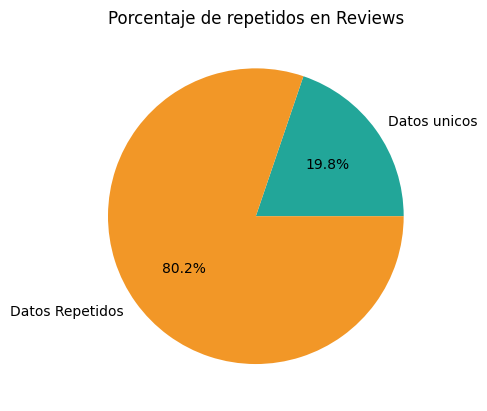

In [10]:
cantidad_unicos_review = len(df.reviewers.unique())
values = [cantidad_unicos_review,(~df.reviewers.isnull()).sum()-cantidad_unicos_review ]
labels = ['Datos unicos', 'Datos Repetidos']
colors = ['#22A699' ,'#F29727']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de repetidos en Reviews')

plt.show()

    - El dato con mayor frecuencia es 'By Deleted A' con una frecuencia de 5412

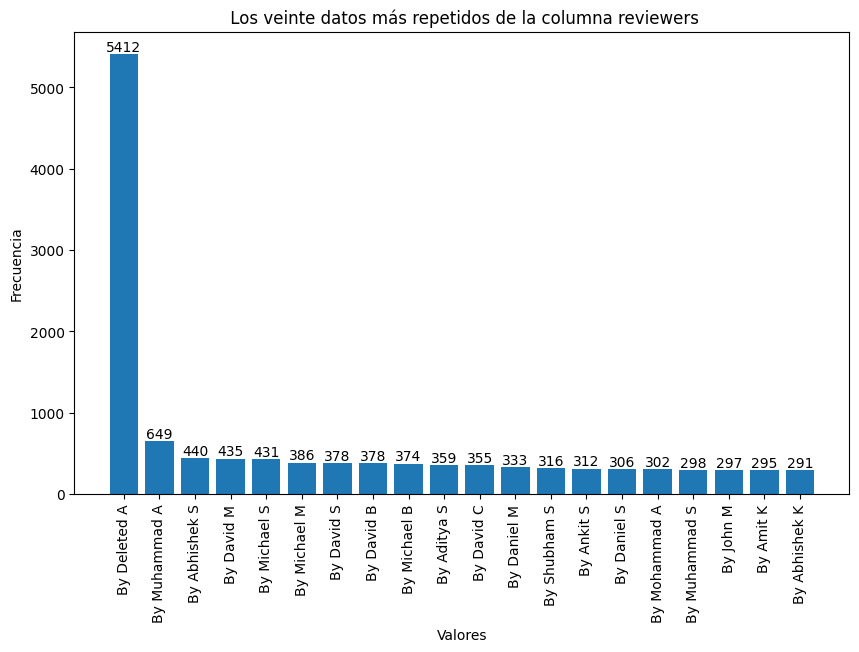

In [11]:
# Filtrar las columnas con valores nulos mayores a cero
frecuencia = df.reviewers.value_counts().head(20)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(' Los veinte datos más repetidos de la columna reviewers')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

    - Podemos observar que la frecuencia de "By Deleted A" es muy alta en comparación a los otros valores, lo que podría ser muestra de que este valor es un outlier, revisemos aquellos datos relacionados a este valor en busca de una razón:

In [41]:
df[df.reviewers == "By Deleted A"][['reviews','date_reviews','course_id','rating']]

,reviews,date_reviews,course_id,rating
1450969,great experiece,2020-04-17,technical-support-fundamentals,5
1451061,Keep it coming.,2018-09-19,technical-support-fundamentals,5
1451069,That was great!,2018-04-06,technical-support-fundamentals,5
1451086,Keep it coming.,2018-09-19,technical-support-fundamentals,5
1451094,That was great!,2018-04-06,technical-support-fundamentals,5
1451111,Keep it coming.,2018-09-19,technical-support-fundamentals,5
1451119,That was great!,2018-04-06,technical-support-fundamentals,5
1451920,Nice course help me gain some important and Es...,2019-12-25,financial-markets-global,5
1452142,best course,2020-06-22,financial-markets-global,5
1452393,"GRACIAS por hacer de este curso, mi SUEÑO. He ...",2020-08-07,introduction-psychology,5


    - Parece que pueden haber datos repetidos, con mismos valores en reviews, date_reviews, course_id; agrupemos y contemos las similitudes

In [42]:
sum(df[df.reviewers == "By Deleted A"].groupby(['reviews','date_reviews','course_id','rating'])['reviews'].value_counts().loc[lambda x: x > 1])

5230

    - Hay 5230, los cuales se repiten más de una vez en sus valores relacionados a las columnas 'reviews','date_reviews','course_id','rating' al ser una frecuencia tan baja en comparación a la totalidad de datos, se podría tomar como un error sin importancia, pero, si tuviese una frecuencia mucho más alta, podría ser un problema, ya que con reviews repetidas, se pueden inflar o desinflar las puntuaciones de los cursos artifialmente, desvirtuando la calidad de las puntuaciones que tienen los cursos. Revisemos si hay más repetidos pero en esta oportunidad para todos los reviewers

In [43]:
sum(df.groupby(['reviewers','reviews','date_reviews','course_id','rating'])['reviews'].value_counts().loc[lambda x: x > 1])

1403311

    - Hay en general 1403311 datos que se repiten más de una vez dentro de esta columna con datos iguales en las columnas 'reviewers', 'reviews', 'date_reviews', 'course_id','rating' lo que ya sería un problema ya que estariamos hablando de que más de la mitad de datos están repetidos más de una vez, miremos cuanto son los datos sin repetirse:

In [44]:
valores_unicos_repetidos = df.groupby(['reviewers','reviews','date_reviews','course_id','rating'])['reviews'].value_counts().loc[lambda x: x > 1].count()
valores_unicos_sin_repetirse = df.groupby(['reviewers','reviews','date_reviews','course_id','rating'])['reviews'].value_counts().loc[lambda x: x == 1].count()


In [46]:
total_datos = valores_unicos_repetidos + valores_unicos_sin_repetirse
total_datos

519886

    - Habrían 519886 realmente diferentes entre ellos, lo cual serían menos de la mitad de los datos disponibles de todo el dataset

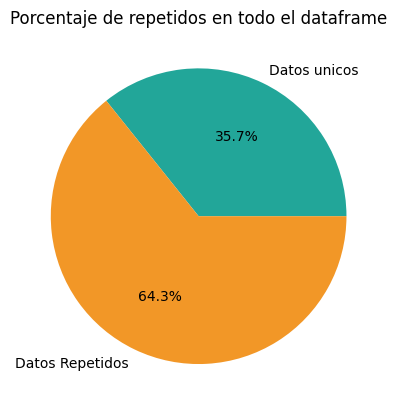

In [48]:
total = df.shape[0]
values = [total_datos,total - total_datos ]
labels = ['Datos unicos', 'Datos Repetidos']
colors = ['#22A699' ,'#F29727']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de repetidos en todo el dataframe')

plt.show()

    - Se recomienda hacer una limpieza del dataset, retirando el exceso de repetidos en caso de querer usar la información de forma precisa, o utilizar el dataset cómo está con el riesgo de tener conclusiones con valores muy altos

#### Date_reviews


    - De los datos disponibles, solo 1892 son unicos, pero no necesariamente tiene que ser un problema, muchos usuarios pudieron hacer varias reviews el mismo día
    - La columna corresponde a fechas, pero en vez de ser tipo de datos "fecha", los datos de esta columna es tomado como "object" lo que puede significar que entre todos los datos, pueden haber datos distintos a una fecha, miremos si es el caso:

In [33]:
df['date_reviews'] = pd.to_datetime(df['date_reviews'])

# Verifica si hay valores no nulos y diferentes a fechas
if df['date_reviews'].notna().any():
    datos_na = df.loc[df['date_reviews'].notna(), 'date_reviews'].apply(
        lambda x: isinstance(x, pd._libs.tslibs.nattype.NaTType)
    )
    if datos_na.any():
        print("Se encontraron valores no relacionados con fechas en la columna 'date_reviews'.")
    else:
        print("Todos los valores en la columna 'date_reviews' son fechas.")
else:
    print("La columna 'date_reviews' no contiene valores.")

Todos los valores en la columna 'date_reviews' son fechas.


    - Todos los datos son fechas, por lo que su estado de ser datos "object" solo se debe a la conversión de CSV a dataframe por parte de la libreria pandas
    

#### Course_id

    - Es la columna donde se almacenan los id de los cursos a los que se les hace la review
    - El dato con mayor frecuencia es python, con una frecuencia de 45218

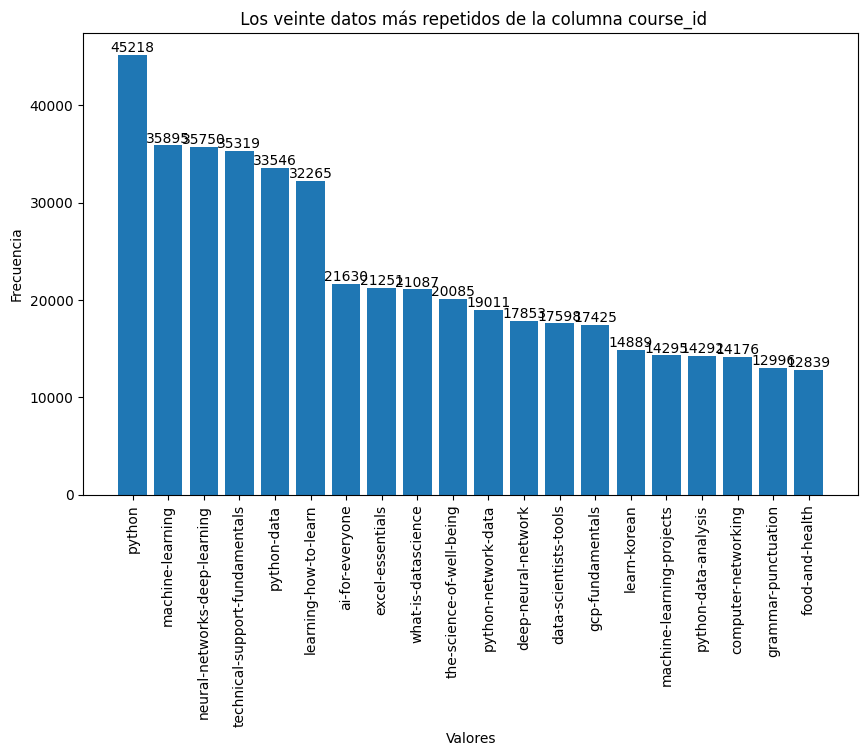

In [49]:
# Filtrar las columnas con valores nulos mayores a cero
frecuencia = df.course_id.value_counts().head(20)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(' Los veinte datos más repetidos de la columna course_id')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

    - Bajo la premisa de que los datos están repetidos dada en el analisis de la columna reviewers, implica que los resultados aquí vistos pueden ser afectados con respecto a los datos repetidos, se recomienda limpiar los datos antes de usarlos

# Analisis edx_courses.csv

In [169]:
df = pd.read_csv('datasets/edx_courses.csv')

In [51]:
df.shape

(975, 16)

Tenemos 975 filas y 16 columnas en este dataframe

In [52]:
df.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

Tenemos varias columnas, estas son:
- title
- summary 
- n_enrolled 
- course_type 
- institution
- instructors 
- Level
- subject
- language 
- subtitles
- course_effort 
- course_length
- price
- course_description
- course_syllabus 
- course_url

Observemos información general de las columnas:

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

De esta tabla podemos observar que:
- Las columnas title, course_type, institution, level, subject, language, course_effort, course_length, price, course_url, no tienen valores nulos aparentemente.
- Las columnas n_enrolled, instructors subtitles, course_description, course_syllabus tienen valores nulos o faltantes
- Todas las columnas al ser del tipo object, deberían contener unicamente datos del tipo texto, pero lo que sería la columa "price" en español "precio", debería ser numerica si es que realmente se trata de los precios de los cursos.  

Observemos una descripción del dataframe antes de adentrarnos en el analisis de cada variable:

De la información anterior podemos observar por columna que:

In [167]:
df.describe()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,414,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,411,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"97,291",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",Course Outline:,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


#### Title

- La columna está compuesta en su mayoría por valores unicos, siendo los unicos repetidos los siguientes:

In [6]:
df.title.value_counts().loc[lambda x: x > 1]

title
Introduction to Probability    2
Marketing Management           2
Introduction to Marketing      2
Name: count, dtype: int64

- Los cursos Introduction to Probability, Marketing Management, Introduction to Marketing están repetidos 2 veces cada uno, lo cual podría ser un error, revisemos a profundidad esto:

In [18]:
consulta = df[df.title =='Introduction to Probability']

consulta

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
59,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...


Usando el metodo Equals, podemos revisar si 2 filas son iguales

In [19]:
son_iguales = consulta.iloc[0].equals(consulta.iloc[1])

if son_iguales:
    print("Las filas son iguales.")
else:
    print("Las filas son diferentes.")

Las filas son iguales.


En el caso del curso Introduction to Probability, ambas filas son iguales, lo que puede implicar un error. Sigamos con Marketing Management

In [20]:
consulta =df[df.title == 'Marketing Management']
consulta

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
159,Marketing Management,Learn how to effectively apply marketing manag...,"80,010",Self-paced on your time,Indian Institute of Management Bangalore,Ashis Mishra,Intermediate,Business & Management,English,"English, हिन्दी",2–4 hours per week,9 Weeks,FREE-Add a Verified Certificate for $150 USD,According to world-renowned management consult...,NaN,https://www.edx.org/course/marketing-management
388,Marketing Management,Learn key marketing strategies and tactics to ...,"43,415",Instructor-led on a course schedule,"The University of Maryland, College Park-Unive...",Judy Frels-David Godes-P.K. Kannan-Mary Beth F...,Advanced,Business & Management,English,English,8–10 hours per week,7 Weeks,FREE-Add a Verified Certificate for $214 USD,"Mark Cuban, owner of the Dallas Mavericks, put...",NaN,https://www.edx.org/course/marketing-management-2


In [21]:
son_iguales = consulta.iloc[0].equals(consulta.iloc[1])

if son_iguales:
    print("Las filas son iguales.")
else:
    print("Las filas son diferentes.")

Las filas son diferentes.


Ambas filas son diferentes en varios campos, tienen descripciones, duraciones, profesores y otros campos diferentes, lo unico similar es su nombre. Observemos ahora Introduction to Marketing

In [22]:
consulta = df[df.title == 'Introduction to Marketing']
consulta

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
161,Introduction to Marketing,"Learn the fundamentals to marketing, including...","169,126",Self-paced on your time,University of British Columbia,Darren Dahl-Paul Cubbon,Introductory,Business & Management,English,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $150 USD,Marketing is a crucial function in all busines...,NaN,https://www.edx.org/course/introduction-to-mar...
561,Introduction to Marketing,An introduction to the role of marketing in a ...,NaN,Self-paced on your time,The University of Edinburgh,Ewelina Lacka-Malcolm Kirkup-Asanka de Silva-A...,Introductory,Business & Management,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD,Do you want to learn how successful businesses...,NaN,https://www.edx.org/course/introduction-to-mar...


In [23]:
son_iguales = consulta.iloc[0].equals(consulta.iloc[1])

if son_iguales:
    print("Las filas son iguales.")
else:
    print("Las filas son diferentes.")

Las filas son diferentes.


Un caso similar al anterior, solo comparten similitudes en el titulo, pero de resto, hay diferencias entre columnas, no es un error

#### Summary

- La columna en su gran mayoría está compuesta de valores unicos, con algunos valores nulos o faltantes.
- El dato más con mayor frecuencia es This course is part of a MicroMasters® Program, con una frecuencia de 15

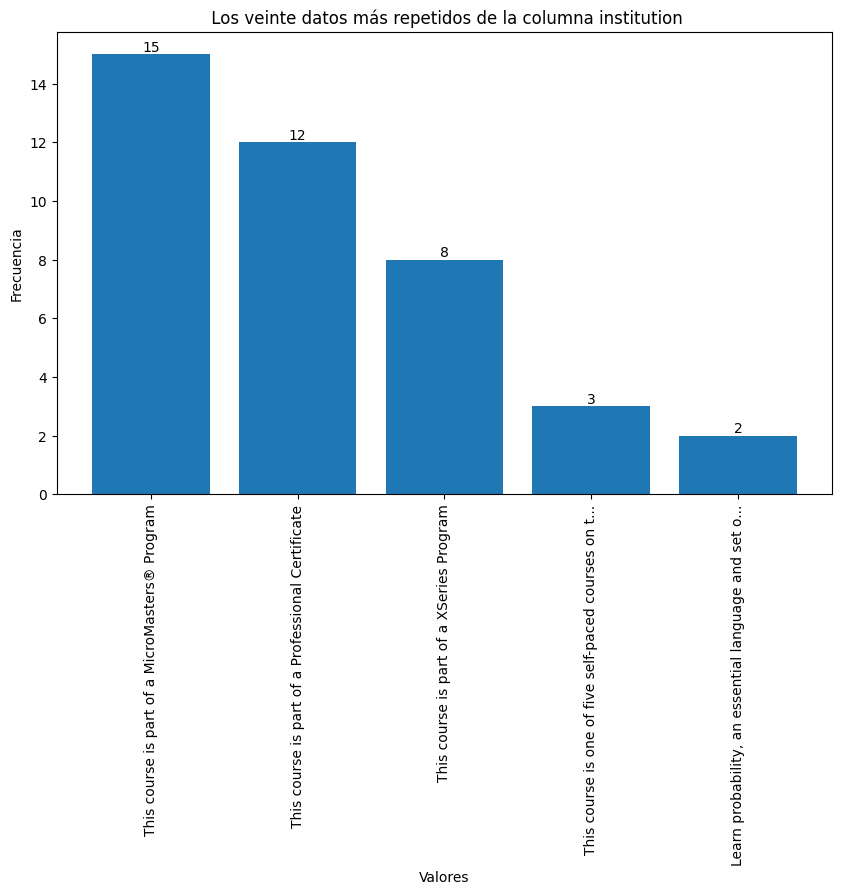

In [70]:
# Filtrar las columnas con valores nulos mayores a cero
frecuencia = df.summary.value_counts().loc[lambda x: x>1]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(' Los veinte datos más repetidos de la columna institution')

#Configurar titulos
titulos = []
for texto in frecuencia.index:
    titulos.append(texto[:50]+"..." if len(texto) > 50 else texto)
# Mostrar el gráfico
plt.xticks(frecuencia.index,titulos,rotation=90)
plt.show()

- Los otros datos repetidos son los lo que se ven arriba en el gráfico. De resto, todos las demás "summary" son valores unicos, exceptuando los nulos.
- Observemos aquellos valores nulos:

In [82]:
df.summary.isna().sum()

53

In [83]:
df[df.summary.isna()].head(4)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
45,CS50 for Lawyers,NaN,"87,336",Self-paced on your time,Harvard University,Doug Lloyd-David J. Malan,Introductory,Computer Science,English,English,3–6 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,NaN,NaN,https://www.edx.org/course/cs50-for-lawyers
52,Introduction to Data Wise: A Collaborative Pro...,NaN,"117,410",Self-paced on your time,Harvard University,Kathryn Parker Boudett,Intermediate,Education & Teacher Training,English,"English, Español",1–2 hours per week,10 Weeks,FREE-Add a Verified Certificate for $70 USD,Educators have an ever-increasing stream of da...,NaN,https://www.edx.org/course/introduction-to-dat...
109,Introduction to Investments,NaN,"91,788",Self-paced on your time,Indian Institute of Management Bangalore,S.G. Badrinath,Intermediate,Business & Management,English,English,3–5 hours per week,5 Weeks,FREE-Add a Verified Certificate for $50 USD,"When you complete this course, you will become...",NaN,https://www.edx.org/course/introduction-to-inv...
165,First Nights - Beethoven's 9th Symphony and th...,NaN,"37,426",Self-paced on your time,Harvard University,Thomas Forrest Kelly,Introductory,Humanities,English,English,3–5 hours per week,3 Weeks,FREE-Add a Verified Certificate for $49 USD,Ludwig van Beethoven’s 9th Symphony premiered ...,NaN,https://www.edx.org/course/first-nights-beetho...


- Hay 53 datos en esta columna, que no necesariamente deben de ser una error o problema, pues el resto de campos relacionados a estos valores nulos, tienen información de los cursos, y sabiendo que la columna "summary" en español "resumen", busca tener una breve descripción del curso, que no la haya no debería perjudicar a groso modo el analisis de los cursos, siempre y cuando el curso los demás campos relacionados no sean nulos 
- Observemos las distribución de palabras con una nube de palabras:

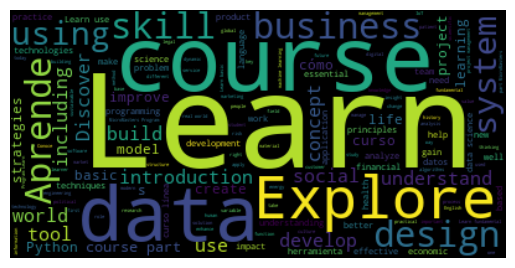

In [86]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Extraer los valores de la columna deseada en forma de texto
text = ' '.join(df['summary'].dropna().astype(str).tolist())

# Tokenizar el texto en palabras individuales
tokens = word_tokenize(text)

# Eliminar las stopwords del texto tokenizado
stop_words = set(stopwords.words(['spanish', 'english']))  # Cambia 'spanish' al idioma de tu elección
tokens = [word for word in tokens if word.lower() not in stop_words]

# Unir los tokens nuevamente en un solo texto
filtered_text = ' '.join(tokens)

# Crear la nube de palabras
wordcloud = WordCloud().generate(filtered_text)

# Visualizar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Se puede observar como predomina la palabra "learn", "data", "course", lo que puede implicar que hay varios cursos de ciencia de datos o relacionados en la plataforma de donde proviene este dataset, también resaltan algunas palabras en español, por lo que implica que hay cursos tanto españoles como ingleses en la plataforma

#### N_enrolled

- Revisemos El contenido de esta columna:

In [95]:
df.n_enrolled

0        124,980
1        293,864
2      2,442,271
3        129,555
4         81,140
         ...    
970          NaN
971          NaN
972       11,246
973        8,775
974          NaN
Name: n_enrolled, Length: 975, dtype: object

- Al parecer, contiene numeros, pero al tener valores nulos en esta, puede la columna puede cambiar el tipo de datos a tipo texto, revisemos la cantidad de nulos:

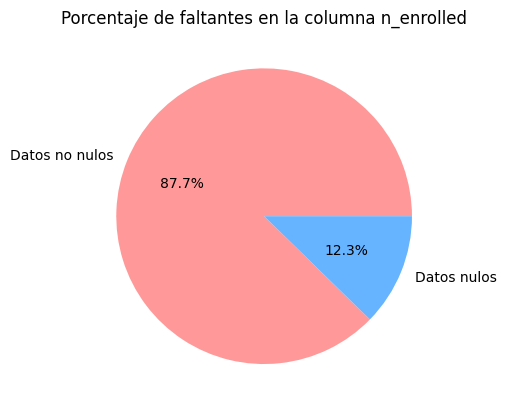

In [96]:
cantidad_datos_reviews = df.n_enrolled.count()
values = [cantidad_datos_reviews, df.shape[0]-cantidad_datos_reviews ]
labels = ['Datos no nulos', 'Datos nulos']
colors = ['#ff9999', '#66b3ff']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de faltantes en la columna n_enrolled')

plt.show()

- Se puede observar que son bastantes los nulos en esta columna, revisemos algunos de los datos relacionados a estos nulos:

In [98]:
df[df.n_enrolled.isna()].head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
13,English Grammar and Style,Learn key concepts and strategies in grammar a...,NaN,Instructor-led on a course schedule,The University of Queensland,Roslyn Petelin,Introductory,Humanities,English,English,3–4 hours per week,8 Weeks,FREE-Add a Verified Certificate for $99 USD,With the rise of social media and the Internet...,"In Week 1 , we'll introduce you to the course ...",https://www.edx.org/course/english-grammar-and...
459,Business Communication,Learn how to effectively communicate and build...,NaN,Self-paced on your time,Rochester Institute of Technology,Andrea Hickerson-Keri Barone,Introductory,Communication,English,English,4–6 hours per week,3 Weeks,FREE-Add a Verified Certificate for $199 USD,Business communication is vital to professiona...,NaN,https://www.edx.org/course/business-communicat...
462,Agua 2.0: empresas eficientes para el siglo XXI,El curso te presenta una visión integral de la...,NaN,Self-paced on your time,Inter-American Development Bank,Sergio Campos-Corinne Cathala-Federico Pérez,Introductory,Business & Management,Español,Español,2–3 hours per week,8 Weeks,FREE-Add a Verified Certificate for $25 USD,¿Eres un profesional o actor activo del sector...,Módulo 1 - Las empresas de agua y saneamiento ...,https://www.edx.org/course/agua-20-empresas-ef...
494,Introduction to Cloud Computing,"Master the core concepts in Cloud Computing, f...",NaN,Self-paced on your time,IBM,Rav Ahuja,Introductory,Computer Science,English,English,1–2 hours per week,6 Weeks,FREE-Add a Verified Certificate for $49 USD,This course introduces you to the core concept...,Module 1: Overview of Cloud ComputingModule 2:...,https://www.edx.org/course/introduction-to-clo...
502,SQL aplicado en la ciencia de datos,Aprende a usar y aplicar el poderoso lenguaje ...,NaN,Self-paced on your time,IBM,Rav Ahuja,Introductory,Data Analysis & Statistics,Español,Español,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $39 USD,Gran parte de los datos del mundo viven en bas...,NaN,https://www.edx.org/course/sql-aplicado-en-la-...


In [99]:
df[df.n_enrolled.isna()].tail(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
967,Drones and Autonomous Systems 2: Applications ...,Learn the latest applications of unmanned aeri...,NaN,Self-paced on your time,University of Maryland Global Campus-Universit...,"Brian Powers, M.A.",Intermediate,Science,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD,If you want to be the technology specialist wh...,"Week 1: Introduction to hazards, disasters and...",https://www.edx.org/course/drones-and-autonomo...
968,MathTrackX: Differential Calculus,Discover concepts and techniques relating to d...,NaN,Self-paced on your time,University of Adelaide,Dr Melissa Humphries-Dr Danny Stevenson-Dr Dav...,Introductory,Math,English,English,3–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $79 USD,This course is part three of the MathTrackX XS...,NaN,https://www.edx.org/course/mathtrackx-differen...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",NaN,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $79 USD,This course is part two of the MathTrackX XSer...,NaN,https://www.edx.org/course/mathtrackx-special-...


- Algo que denotar, es que la falta de datos en la columna "n_enrolled" parece estar relacionada a que en la columna "price" el curso esté gratis, pero, toda la columna "price", contiene el "free" en sus textos, por lo que no se puede relacionar la falta de nulos con esto

In [113]:
df.price.loc[df['price'].str.contains('free', case=False)].count()

975

- La columna "n_enrolled" hace referencia a la cantidad de personas inscritas al curso, por lo que la falta de datos en esta columna podría perjudicar las metricas en el analisis de los cursos, se recomienda obviar estos datos o buscar rellenarlos con nueva información

#### Course_type

- La columna no tiene no tiene nulos, y tiene solo 2 valores unicos, por lo que el resto son repetidos de estos

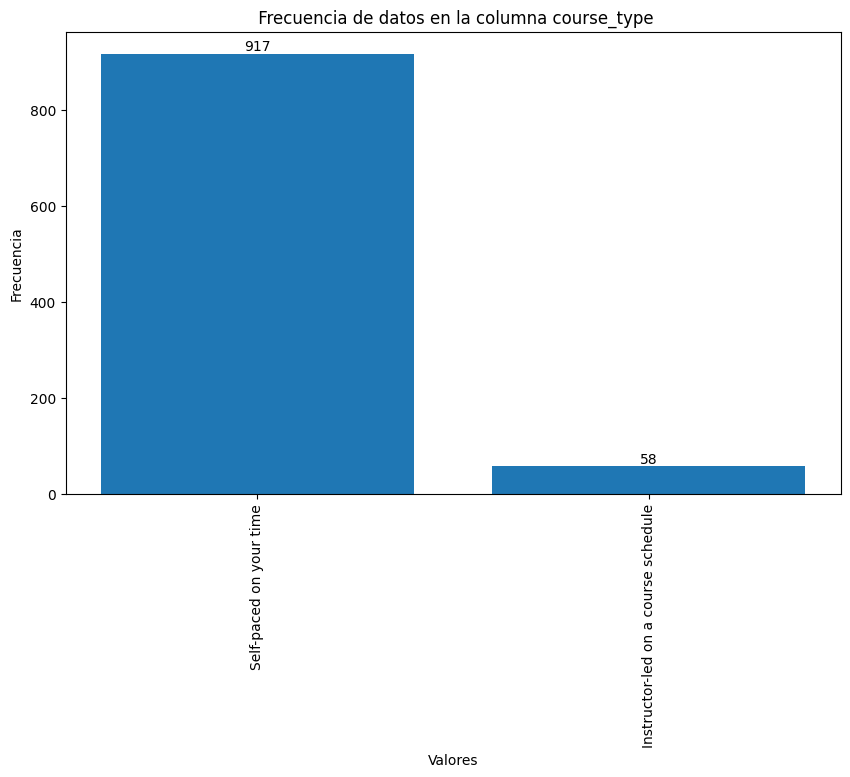

In [119]:
# Filtrar las columnas con valores nulos mayores a cero
frecuencia = df.course_type.value_counts().loc[lambda x: x>1]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(' Frecuencia de datos en la columna course_type')


# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

- Por lo que se puede concluir que en esta plataforma, los cursos "self paced on your time" o "hechos a tu tiempo", priman sobre los que son tutoreados o "instructor-led on a course schedule"

#### Institution

- La columna contienen las instituciones que imparten los cursos
- No hay nulos, y hay 111 datos unicos, que representan las 111 instituciones que nos podremos encontrar impartiendo los cursos
- La institución con mayor frecuencia es Harvard University, con una frecuencia de 104, volviendose en la institución lider en la generación de cursos

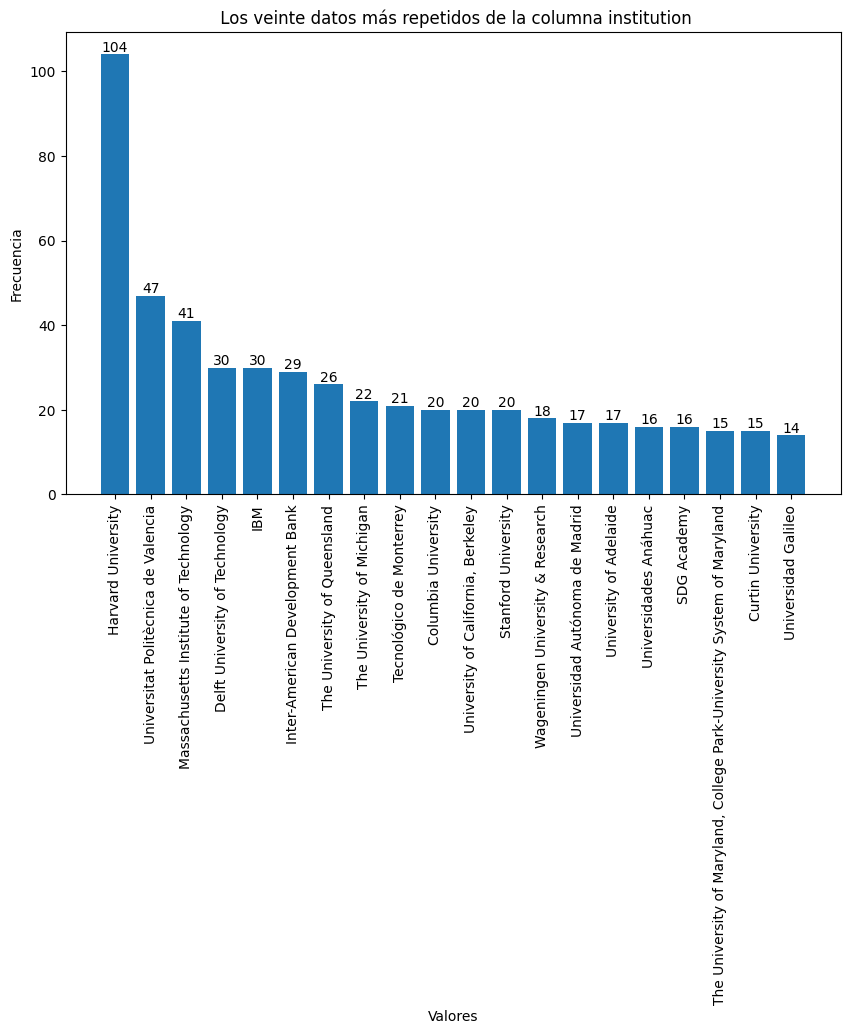

In [118]:
# Filtrar las columnas con valores nulos mayores a cero
frecuencia = df.institution.value_counts().loc[lambda x: x>1].head(20)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(' Los veinte datos más repetidos de la columna institution')


# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

#### Instructors

- Tiene una gran cantidad de datos unicos (775 datos)
- El dato con mayor frecuencia es Rafael Irizarry, con una frecuencia de 9
- Tiene solo 3 datos nulos, revisemos si hay alguna relación entre ellos

In [127]:
df[df.instructors.isna()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
390,Analytics in Python,Learn the fundamental of programming in Python...,"82,210",Instructor-led on a course schedule,Columbia University,NaN,Intermediate,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,Data is the lifeblood of an organization. Comp...,NaN,https://www.edx.org/course/analytics-in-python
401,Just Reading and Writing in English | 生活英语读写,Learn how to read and write in English in the ...,"33,303",Self-paced on your time,Tsinghua University,NaN,Introductory,Art & Culture,English,English,2–4 hours per week,15 Weeks,FREE-Add a Verified Certificate for $149 USD,Reading enriches our life and writing enables ...,Week 1 - Learning\nIntroduction to the problem...,https://www.edx.org/course/just-reading-and-wr...
516,"Data, Models and Decisions in Business Analytics",Learn fundamental tools and techniques for usi...,"36,289",Instructor-led on a course schedule,Columbia University,NaN,Advanced,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,"In today’s world, managerial decisions are inc...",NaN,https://www.edx.org/course/data-models-and-dec...


- No muestra tener aparentes relaciones los datos nulos con otros campos, por lo que considero tolerable omitir estos nulos

#### Level

- No tiene ningún dato nulo
- Se divide en 3 categorías de la siguiente manera 

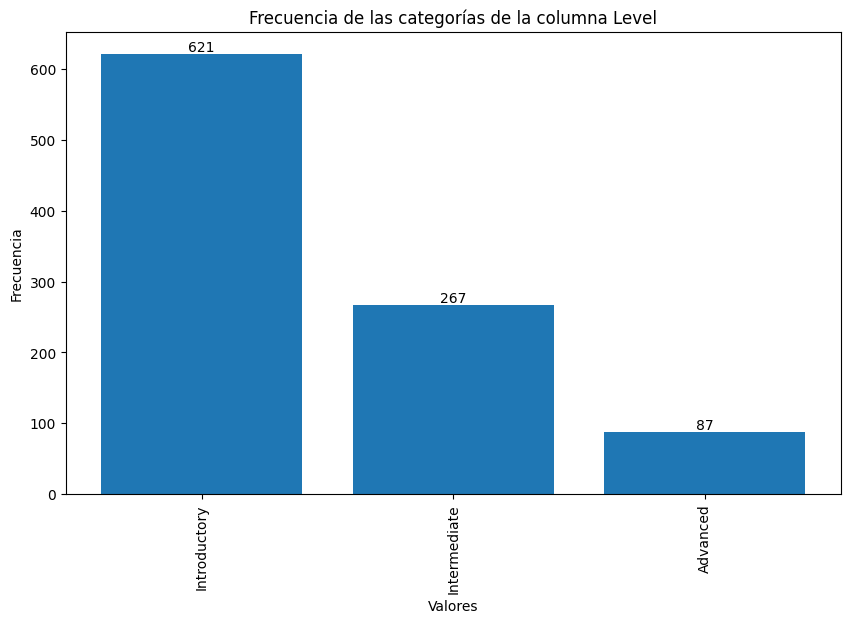

In [130]:
# Filtrar las columnas con valores nulos mayores a cero
frecuencia = df.Level.value_counts().loc[lambda x: x>1]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las categorías de la columna Level')


# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

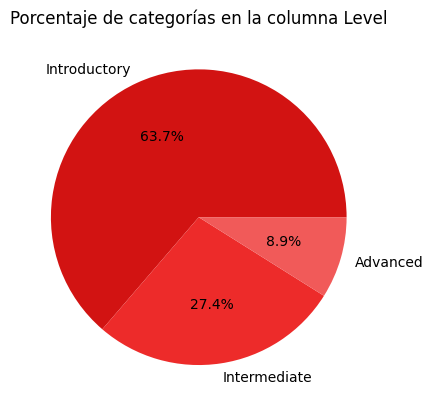

In [145]:
cantidad_datos_reviews = frecuencia = df.Level.value_counts().loc[lambda x: x>1]
values = [cantidad_datos_reviews.values[0],cantidad_datos_reviews.values[1],cantidad_datos_reviews.values[2]  ]
labels = [cantidad_datos_reviews.index[0], cantidad_datos_reviews.index[1],cantidad_datos_reviews.index[2]]
colors = ['#D21312','#ED2B2A', '#F15A59']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de categorías en la columna Level')

plt.show()

- De aquí se puede concluir que más de la mitad de cursos de nivl introductorio

#### Subject

- No hay datos nulos
- Hay 31 unicos, el resto son repeticiones de los mismos
- La columna "subject" o "tema" en español, contiene el tema del curso al cual hace referencia
- El tema con mayor frecuencia es el de Computer Science, con una frecuencia de 166

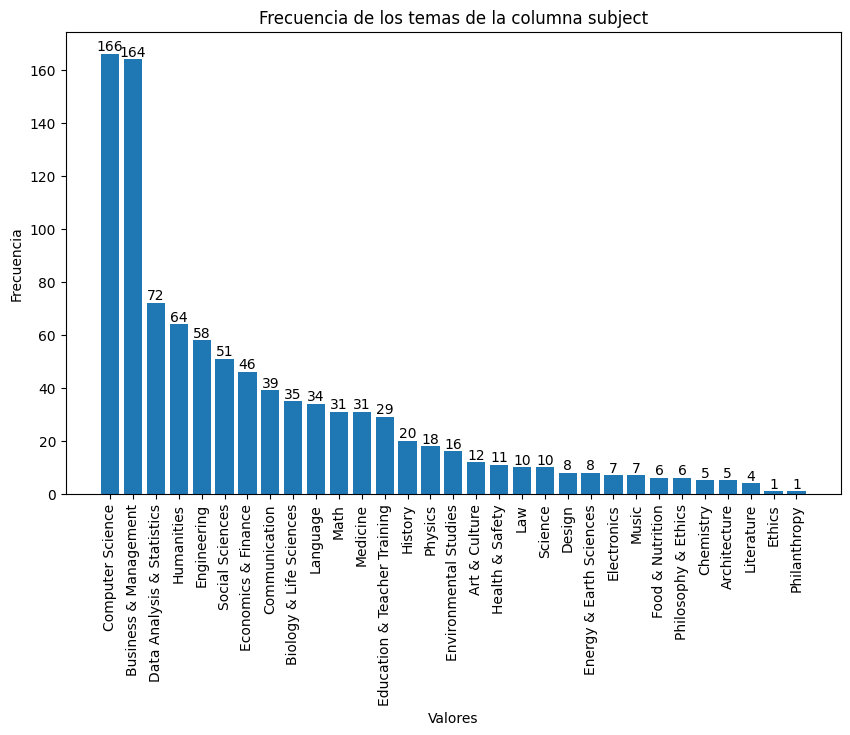

In [148]:
frecuencia = df.subject.value_counts()#.loc[lambda x: x>1]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los temas de la columna subject')


# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

- Los temas de computer science y business & management son los temas con mayor cantidad de cursos de la plataforma

#### Language

- No tiene nulos
- Tiene 9 datos unicos, donde los demás son repeticiones de los mismos
- El dato con mayor frecuencia es "English", con una frecuencia de 777

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\c

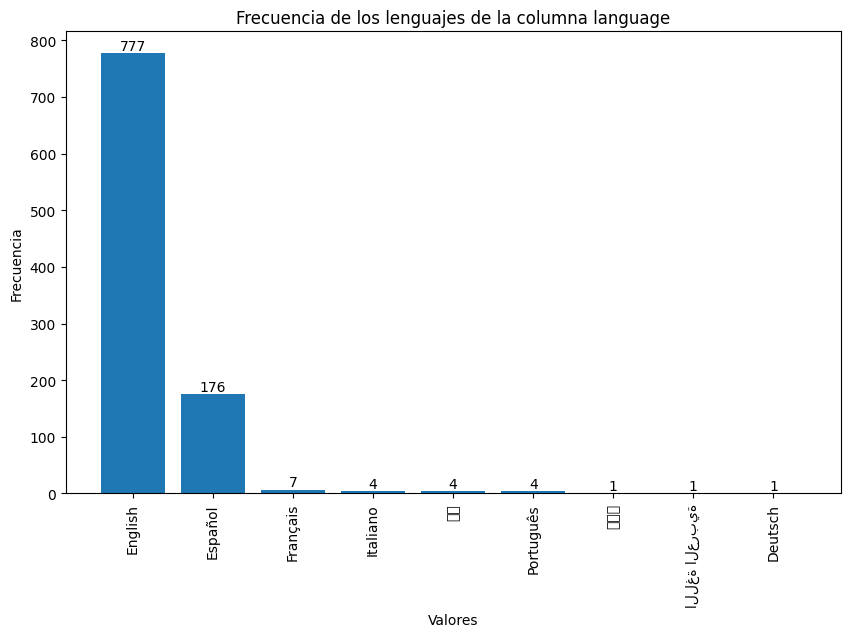

In [151]:
frecuencia = df.language.value_counts()#.loc[lambda x: x>1]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los lenguajes de la columna language')


# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

- Con este grafico de barras se pueden confirmar que "English" es el lenguaje con mayor cantidad de cursos
- Anteriormente en el analisis de la columna "summary", en su wordcloud, podiamos ver como aparecían palabras en español, y aquí podemos confirmar que hay cursos en español, que muy probablemente sean la razón por la cual aparecían palabras en español en el wordcloud

#### Subtitles

- Tiene 33 datos unicos, el resto son repeticiones de estos
- El dato con mayor frecuencia vuelve a ser "English", con una frecuencia de 713

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:15

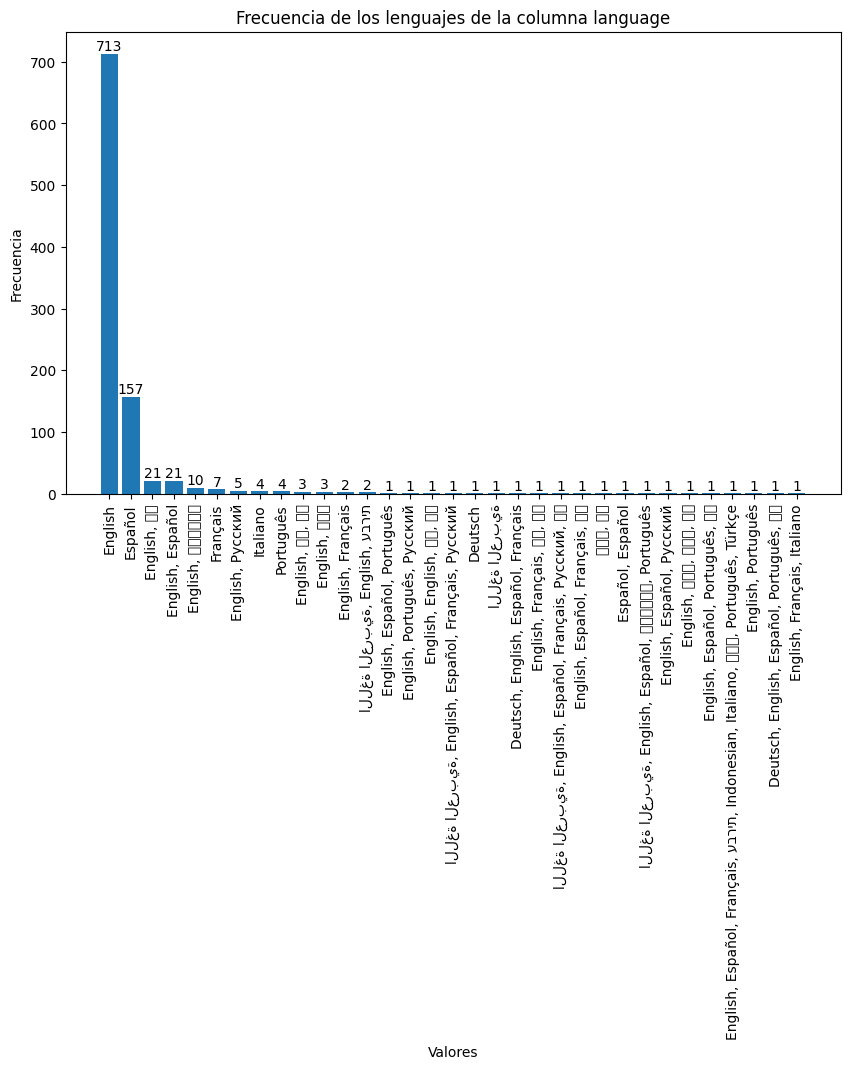

In [152]:
frecuencia = df.subtitles.value_counts()#.loc[lambda x: x>1]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los lenguajes de la columna language')


# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

- De aquí podemos apreciar como "English" y "Español" son los subtitulos más comunes de encontrar en los cursos, pero también podemos ver como hay categorias de subtitulos donde hay combinaciones de varios lenguajes, se recomienda que en caso de hacer un analisis sobre los subtitulos, se limpie la columna y se separen los lenguajes combinados, para tener mejores metricas

- Tiene 3 datos nulos, revisemos estos datos:


In [153]:
df[df.subtitles.isna()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
390,Analytics in Python,Learn the fundamental of programming in Python...,"82,210",Instructor-led on a course schedule,Columbia University,NaN,Intermediate,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,Data is the lifeblood of an organization. Comp...,NaN,https://www.edx.org/course/analytics-in-python
516,"Data, Models and Decisions in Business Analytics",Learn fundamental tools and techniques for usi...,"36,289",Instructor-led on a course schedule,Columbia University,NaN,Advanced,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,"In today’s world, managerial decisions are inc...",NaN,https://www.edx.org/course/data-models-and-dec...
640,Ecodesign for Cities and Suburbs,NaN,"28,472",Self-paced on your time,University of British Columbia,Jonathan Barnett-Larry Beasley,Introductory,Environmental Studies,English,NaN,4–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $99 USD,Too often modern cities and suburbs are disorg...,Week 1: How the usual urban growth model opera...,https://www.edx.org/course/ecodesign-for-citie...


No parecen tener nada relacionado más allá que su lenguaje original es inglés, por lo que se podría considerar como qe estos nulos solo representan una no disponibilidad para estos cursos

#### Course_effort

- No tiene nulos
- Tiene 53 datos unicos, el resto son repeticiones de los mismos
- El dato con mayor frecuencia es "2–4 hours per week", con una frecuencia de 108

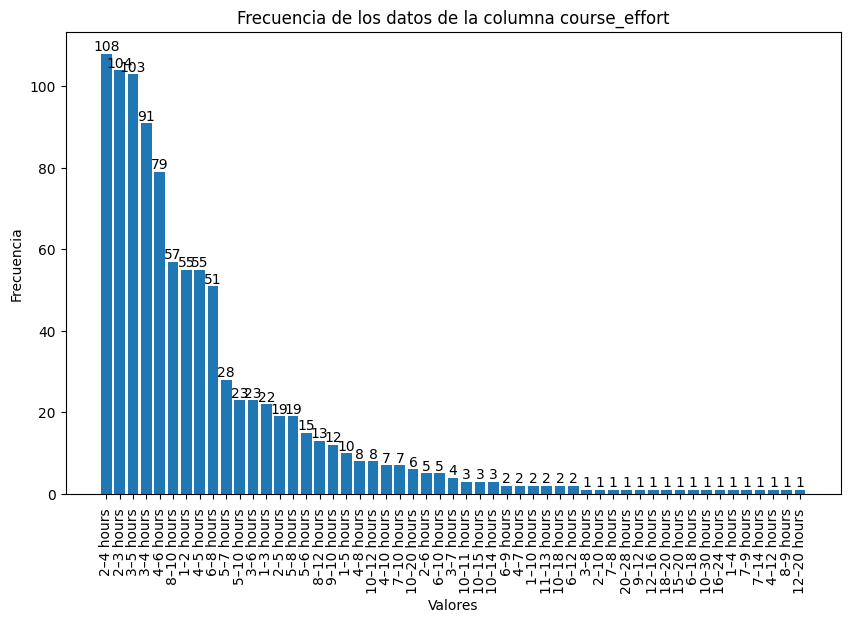

In [157]:
frecuencia = df.course_effort.str.replace('per week', '').value_counts()#.loc[lambda x: x>1]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los datos de la columna course_effort')


# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

- La columna "Course_effort" contiene la cantidad de horas recomendadas por curso para lograr terminarlo.
- Podemos observar la gran cantidad de cursos entre 2 -6 horas a la semana, y la poca cantidad de cursos con +10 hora a la semana

#### Course_length

- No tiene datos nulos
- Tiene 18 datos unicos, los demás son repeticiones de los mismos
- El dato con mayor frecuencia es "4 Weeks", con una frecuencia de 194

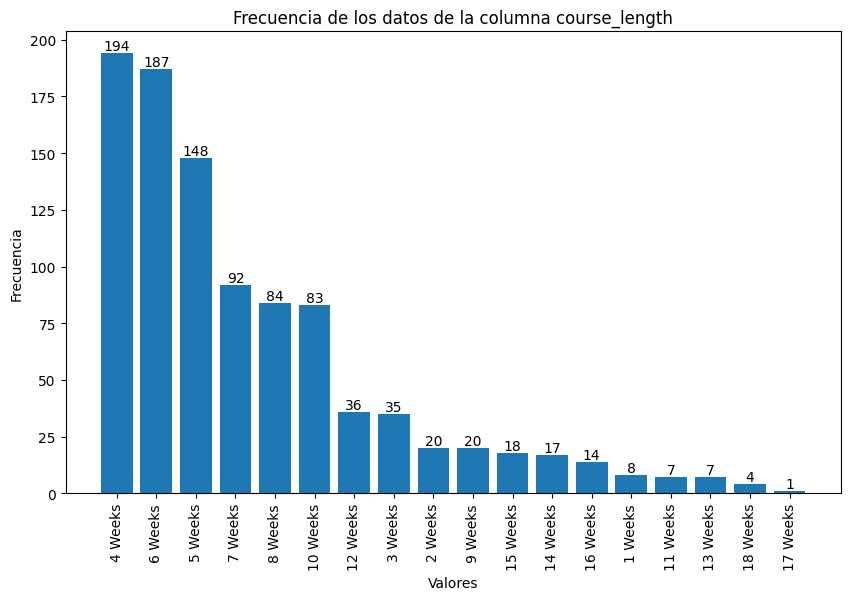

In [159]:
frecuencia = df.course_length.value_counts()#.loc[lambda x: x>1]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los datos de la columna course_length')


# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

- La columna "course_length" consiste en la duración de los cursos en semanas, esta columna va muy de la mano con lo que es la columna "course_effort", pues en esta ultima, se dicta el tiempo recomendado por semana para completar el curso, teniendo presente ambas columnas, podriamos calcular el tiempo a invertir en los cursos

#### Price

- No tiene datos nulos
- Tiene 47 datos unicos, los demás son repeticiones de los mismos
- Su dato con mayor frecuencia es "FREE-Add a Verified Certificate for $49 USD", con una frecuencia de 270, observemos la frecuencia de los datos, retirando la frase "FREE-Add a Verified Certificate for " de los datos, para tomarlos como numeros:

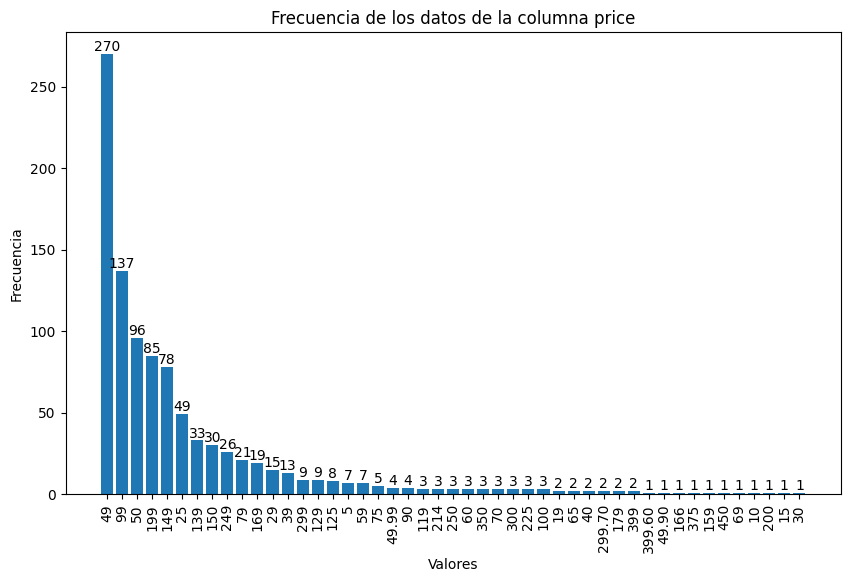

In [206]:
frecuencia = df.price.str.replace("FREE-Add a Verified Certificate for $","").str.replace(' USD', '').value_counts()#.loc[lambda x: x>1])


# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los datos de la columna price')


# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

#### course_description

- Tienes 40 datos nulos/faltantes, teniendo solo 935 datos
- De los datos disponibles, 932 son unicos
- Miremos que datos están repetidos:

In [214]:
filas_duplicadas = df[df.course_description.duplicated(keep=False)]
filas_duplicadas = filas_duplicadas.dropna(subset= "course_description")
filas_duplicadas

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
59,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...
127,Databases: Relational Databases and SQL,This course is one of five self-paced courses ...,"20,502",Self-paced on your time,Stanford University,Jennifer Widom,Introductory,Computer Science,English,English,8–10 hours per week,2 Weeks,FREE-Add a Verified Certificate for $50 USD,"About the Database Series of Courses""Databases...",NaN,https://www.edx.org/course/databases-5-sql
760,Databases: Advanced Topics in SQL,This course is one of five self-paced courses ...,NaN,Self-paced on your time,Stanford University,Jennifer Widom,Introductory,Computer Science,English,English,8–10 hours per week,2 Weeks,FREE-Add a Verified Certificate for $50 USD,"About the Database Series of Courses""Databases...",NaN,https://www.edx.org/course/advanced-topics-in-sql
939,Databases: Modeling and Theory,This course is one of five self-paced courses ...,NaN,Self-paced on your time,Stanford University,Jennifer Widom,Introductory,Computer Science,English,English,8–10 hours per week,2 Weeks,FREE-Add a Verified Certificate for $50 USD,"About the Database Series of Courses""Databases...",NaN,https://www.edx.org/course/modeling-and-theory


- Nos encontramos con 2 filas repetidas, que sería la del curso "Introduction to Probability", donde todos sus valores son iguales. Con eliminar una estaría solucionado el problema
- Nos encontramos con 3 cursos con distinto titulo y url de curso, pero con los mismos datos en el resto de campos, puede ser un error por parte de quién ingresó los cursos, se pueden tomar estas filas para analisis posteriores o obviarlas por ser un probable error
- Miremos la distribución de palabras con una nube de palabras

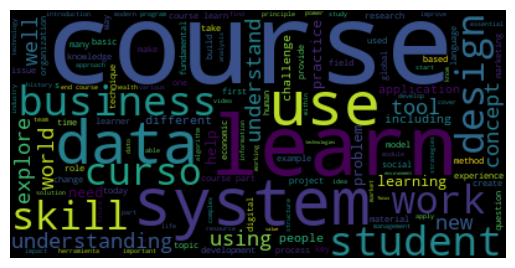

In [215]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Extraer los valores de la columna deseada en forma de texto
text = ' '.join(df['course_description'].dropna().astype(str).tolist())

# Tokenizar el texto en palabras individuales
tokens = word_tokenize(text)

# Eliminar las stopwords del texto tokenizado
stop_words = set(stopwords.words(['spanish', 'english']))  # Cambia 'spanish' al idioma de tu elección
tokens = [word for word in tokens if word.lower() not in stop_words]

# Unir los tokens nuevamente en un solo texto
filtered_text = ' '.join(tokens)

# Crear la nube de palabras
wordcloud = WordCloud().generate(filtered_text)

# Visualizar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Las palabras más resaltantes son course, data, learn, system, business palabras que pueden estar relacionadas a que la mayoria de cursos están dirigidos al aprendizaje de herramientas virtuales, lenguajes de programación, ciencia de datos etc
- Los datos nulos, al igual que los visto en  "summary" pueden pasarse por alto pues no necesariamente un curso debe tener una descripción.

#### course_syllabus

- La columna hace referencia al plan de estudios recomendado para el curso, no necesariamente se debe tener un plan de estudios, por lo que los datos nulos pueden omitirse
- Hay varios datos nulos, de los 975, solo hay 414 datos disponibles
- De los datos disponibles 411 son unicos
- los datos repetidos son:

In [217]:
filas_duplicadas = df[df.course_syllabus.duplicated(keep=False)]
filas_duplicadas = filas_duplicadas.dropna(subset= "course_syllabus")
filas_duplicadas

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
76,Basics of Computing and Programming,This is a self-paced course from NYU that prov...,"37,045",Self-paced on your time,New York University,Itay Tal-Aspen Olmsted,Introductory,Computer Science,English,English,6–8 hours per week,9 Weeks,FREE-Add a Verified Certificate for $200 USD,This is a self-paced course that provides an I...,Course Outline:,https://www.edx.org/course/basics-of-computing...
227,Introduction to Networking,This is a self-paced course from NYU that prov...,"16,134",Self-paced on your time,New York University,Rafail Portnoy-Aspen Olmsted,Introductory,Computer Science,English,English,3–5 hours per week,7 Weeks,FREE-Add a Verified Certificate for $150 USD,This is a self-paced course that provides an I...,Course Outline:,https://www.edx.org/course/introduction-to-net...
286,Precalculus,"This college-level, credit-eligible Precalculu...","55,576",Self-paced on your time,Arizona State University,Adrian Sannier-Sue McClure,Intermediate,Math,English,English,9–10 hours per week,15 Weeks,FREE-Add a Verified Certificate for $49 USD,This course is part of Global Freshman Academy...,Click to view the complete course syllabus here.,https://www.edx.org/course/precalculus
317,College Algebra and Problem Solving,Learn the basics of Algebra while preparing fo...,"103,010",Self-paced on your time,Arizona State University,Adrian Sannier-Sue McClure,Introductory,Math,English,English,8–9 hours per week,15 Weeks,FREE-Add a Verified Certificate for $49 USD,This course is part of Global Freshman Academy...,Click to view the complete course syllabus here.,https://www.edx.org/course/college-algebra-and...
387,Computer Hardware and Operating Systems,This is a self-paced course from NYU that prov...,"9,715",Self-paced on your time,New York University,Daniel Katz-Braunschweig-Aspen Olmsted,Introductory,Computer Science,English,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $150 USD,This is a self-paced course that provides an I...,Course Outline:,https://www.edx.org/course/computer-hardware-a...


- Podemos observar que uno de los repetidos hace referencia a que el curso ya no está disponible online y los otros que el plan de estudios se encuentra en un link que probablemente redirecciona a otra página. Estos repetidos no tienen que ser un problema

#### course_url

- NO tiene nulos
- Solo un dato está repetido:

In [221]:
filas_duplicadas = df[df.course_url.duplicated(keep=False)]
filas_duplicadas = filas_duplicadas.dropna(subset= "course_url")
filas_duplicadas

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
59,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...


- Se puede eliminar una fila para evitaar redundancias

# Analisis udemy_courses.csv

In [3]:
df = pd.read_csv('datasets/udemy_courses.csv')

In [226]:
df.shape

(3678, 12)

Este dataframe contiene 3678 filas con 12 columnas

In [224]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

Las columnas de dataframe son:

- course_id
- course_title
- url
- is_paid
- price
- num_subscribers
- num_reviews
- num_lecture
- level
- content_duration
- published_timestam
- subject

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Tenemos que:

- Ninguna columna tiene datos faltantes
- Las columnas cuantitivas son: course_id, price, num_subscribers, num_reviews, num_lecturas, content_duration
- Las columnas cualitativas son: course_title, url, price, level, pubished_timestamp, subject

Veamos el dataframe de forma general para ver su contenido:

In [230]:
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Ya viendo su contenido, podemos descartar el analis de course_id, pues al ser un id y no faltar ningún dato, su analisis no nos aportaría demasiado. Comencemos con el analisis de las columnas cuantitativas para seguir con las columnas cualitativas:

## Columnas cuantitativas:

Comenzaremos analizando el comportamiendo de las variables cuantitativas:

In [4]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


- Todo parece bien, menos la desviación estandar de las columnas, pues son extremadamente grandes con respecto a sus percentiles y a la media, revisando el valor maximo de cada columna, se puede ver que hay datos muy grandes en cada columna que rompen la media y los percentiles, revisemos con diagramas de disperción la distrubución de estas variables:

#### num_subscribers

In [44]:
# función que usaré para saber la cantidad de datos atipicos
def calcular_cantidad_atipicos(datos):
    # Calcular los límites de los outliers
    Q1 = np.percentile(datos, 25)
    Q3 = np.percentile(datos, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar la cantidad de datos atípicos
    cantidad_atipicos = len([dato for dato in datos if dato < lower_bound or dato > upper_bound])
    return print("Cantidad de datos atípicos:", cantidad_atipicos , " de 3678 - porcentaje de atipicos: ",100*cantidad_atipicos/3678,"%" )

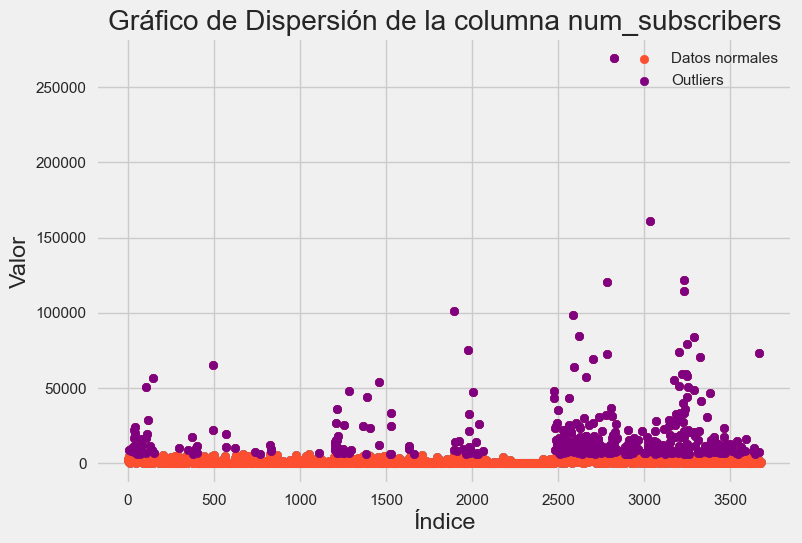

Cantidad de datos atípicos: 433  de 3678 - porcentaje de atipicos:  11.772702555736814 %


In [62]:
column_data = df.num_subscribers

# Crear el gráfico de dispersión
plt.scatter(range(len(column_data)), column_data)

Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear el gráfico de dispersión
plt.scatter(range(len(column_data)), column_data, label = "Datos normales")

# Marcar los outliers
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
plt.scatter(outliers.index, outliers, color='purple', label='Outliers')

# Configuración adicional
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico de Dispersión de la columna num_subscribers')
plt.legend()

# Mostrar el gráfico de dispersión
plt.show()
# Configuración adicional
calcular_cantidad_atipicos(column_data)

Text(0.5, 1.0, 'Diagrama de Caja')

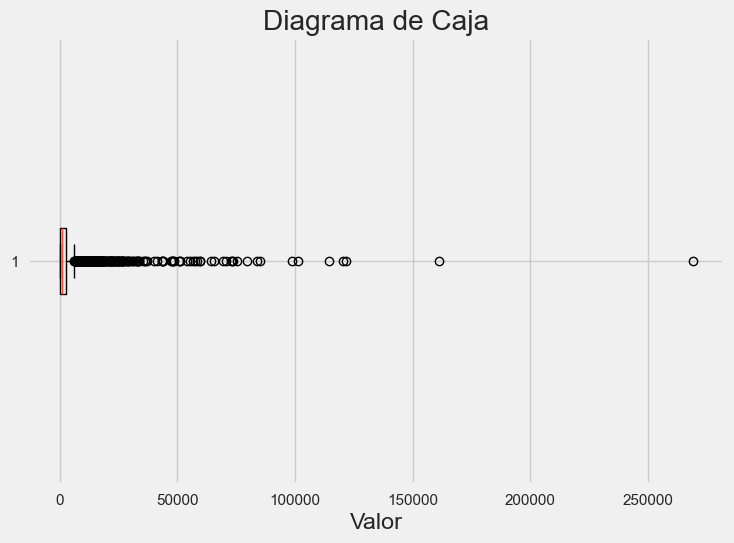

In [63]:
plt.boxplot(column_data, vert=False)

# Configuración adicional
plt.xlabel('Valor')
plt.title('Diagrama de Caja')

En el grafico de dispersion podemos observar que los datos más grandes que el percentil del 75 ( puntos morados) son varios, pero más que un error o un problema, considero que pueden ser valores atipicos probables con respecto al contexto del dataframe, pues si consideramos que estamos revisando un dataframe de una plataforma de cursos online es muy factible que hayan algunos cursos con mayor demanda que otros, y que estos valores que veamos tan alto como outliers, solo sean esos cursos con alta demanda. Considero que este comportamiento también se verá en las demás columnas cuantitativas.

Podemos corroborar la información del grafico de dispersion, con el grafico de barras de abajo, donde podemos ver como circulos, los valores atipicos

#### num_reviews

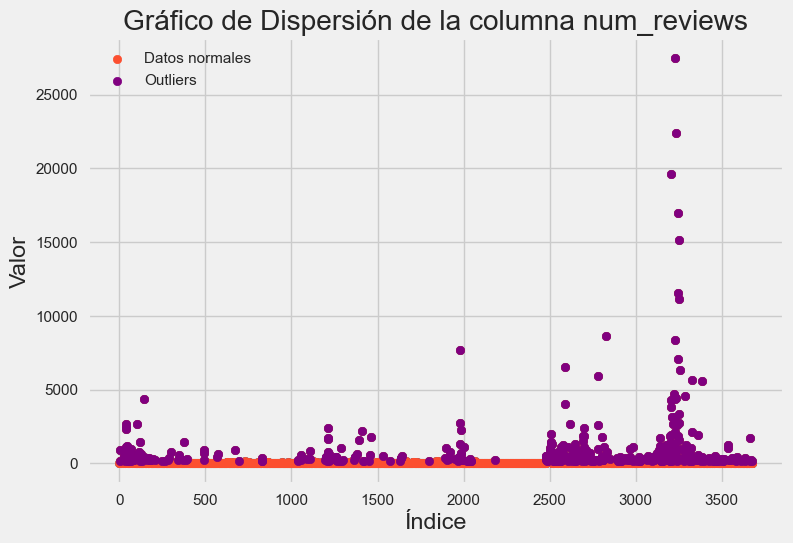

Cantidad de datos atípicos: 494  de 3678 - porcentaje de atipicos:  13.43121261555193 %


In [65]:
column_data = df.num_reviews

# Crear el gráfico de dispersión
plt.scatter(range(len(column_data)), column_data)

Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear el gráfico de dispersión
plt.scatter(range(len(column_data)), column_data, label = "Datos normales")

# Marcar los outliers
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
plt.scatter(outliers.index, outliers, color='purple', label='Outliers')

# Configuración adicional
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico de Dispersión de la columna num_reviews')
plt.legend()

# Mostrar el gráfico de dispersión
plt.show()
# Configuración adicional
calcular_cantidad_atipicos(column_data)

Text(0.5, 1.0, 'Diagrama de Caja')

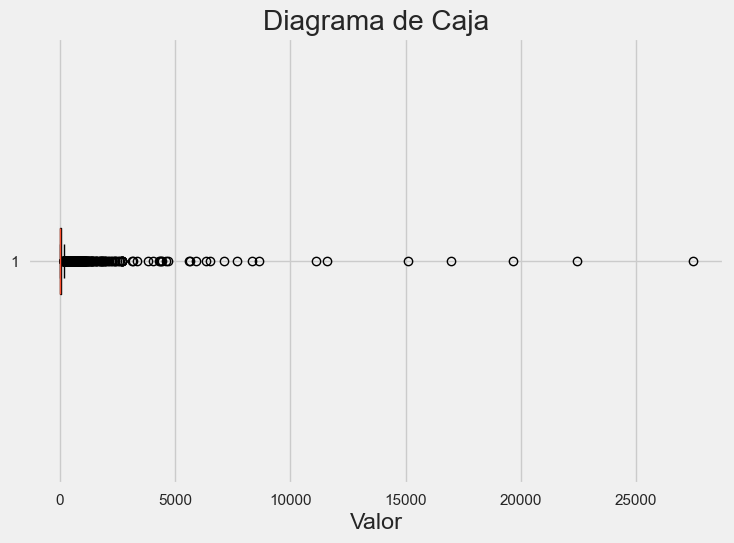

In [66]:
plt.boxplot(column_data, vert=False)

# Configuración adicional
plt.xlabel('Valor')
plt.title('Diagrama de Caja')

#### num_lectures

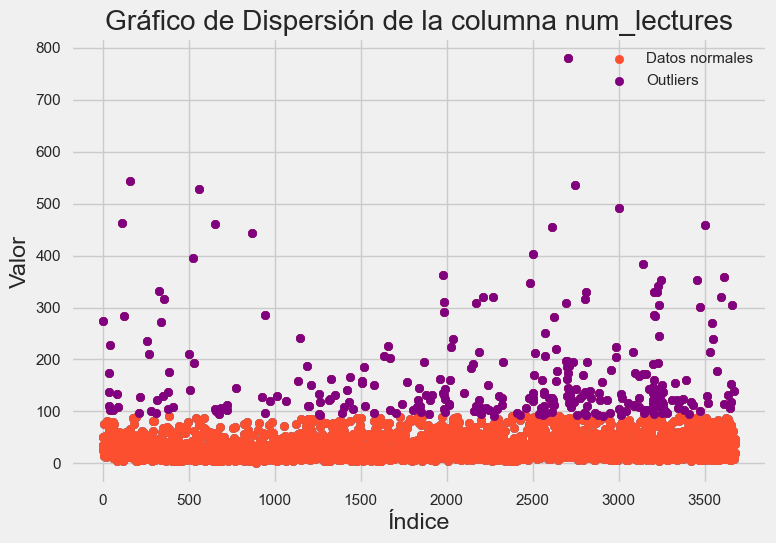

Cantidad de datos atípicos: 293  de 3678 - porcentaje de atipicos:  7.966286025013594 %


In [67]:
column_data = df.num_lectures

# Crear el gráfico de dispersión
plt.scatter(range(len(column_data)), column_data)

Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear el gráfico de dispersión
plt.scatter(range(len(column_data)), column_data, label = "Datos normales")

# Marcar los outliers
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
plt.scatter(outliers.index, outliers, color='purple', label='Outliers')

# Configuración adicional
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico de Dispersión de la columna num_lectures')
plt.legend()

# Mostrar el gráfico de dispersión
plt.show()
# Configuración adicional
calcular_cantidad_atipicos(column_data)

Text(0.5, 1.0, 'Diagrama de Caja')

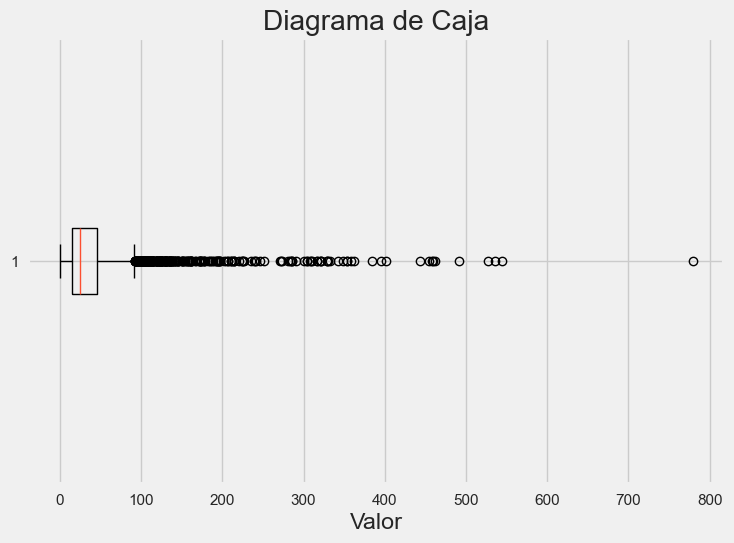

In [68]:
plt.boxplot(column_data, vert=False)

# Configuración adicional
plt.xlabel('Valor')
plt.title('Diagrama de Caja')

#### content_duration

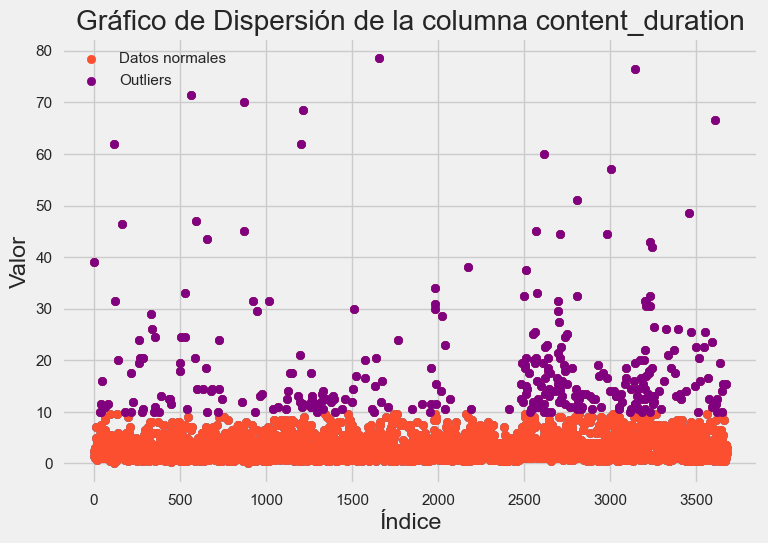

Cantidad de datos atípicos: 313  de 3678 - porcentaje de atipicos:  8.510059815116911 %


In [69]:
column_data = df.content_duration

# Crear el gráfico de dispersión
plt.scatter(range(len(column_data)), column_data)

Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear el gráfico de dispersión
plt.scatter(range(len(column_data)), column_data, label = "Datos normales")

# Marcar los outliers
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
plt.scatter(outliers.index, outliers, color='purple', label='Outliers')

# Configuración adicional
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico de Dispersión de la columna content_duration')
plt.legend()



# Mostrar el gráfico de dispersión
plt.show()
# Configuración adicional
calcular_cantidad_atipicos(column_data)

Text(0.5, 1.0, 'Diagrama de Caja')

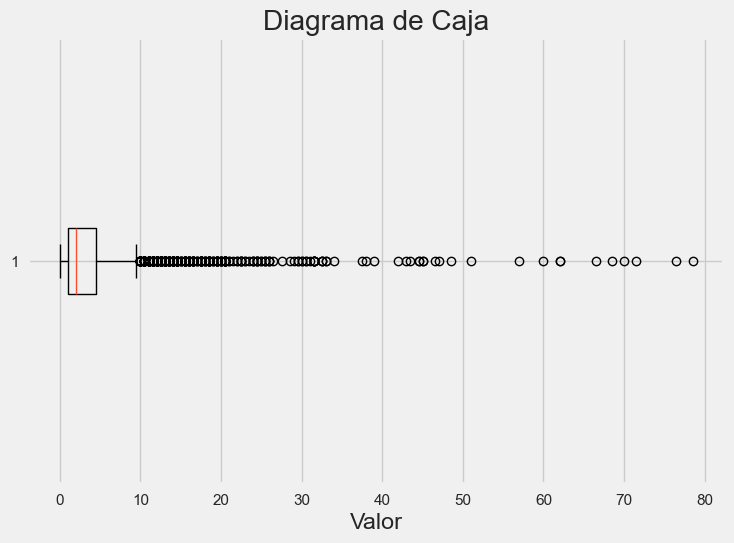

In [70]:
plt.boxplot(column_data, vert=False)

# Configuración adicional
plt.xlabel('Valor')
plt.title('Diagrama de Caja')

#### Precio

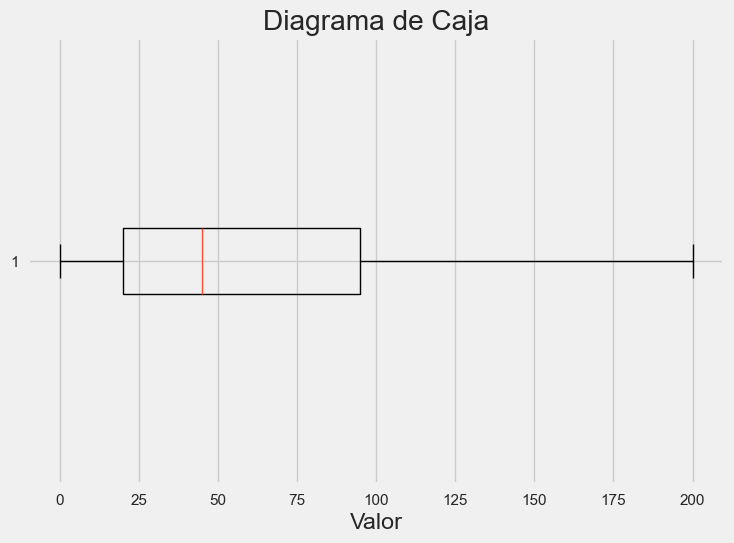

In [71]:
column_data = df.price

# Crear el gráfico de dispersión

plt.boxplot(column_data, vert=False)

# Configuración adicional
plt.xlabel('Valor')
plt.title('Diagrama de Caja')

# Mostrar el diagrama de caja
plt.show()

- Se nota cierto sesgo hacia la izquierda por la mediana (linea roja), y la presencia de valores altos pero no atipicos por los bigotes (lineas negras ) de la derecha e izquierda
- Se puede ver que la mayoría precios de cursos, rondan entre 20 y 100

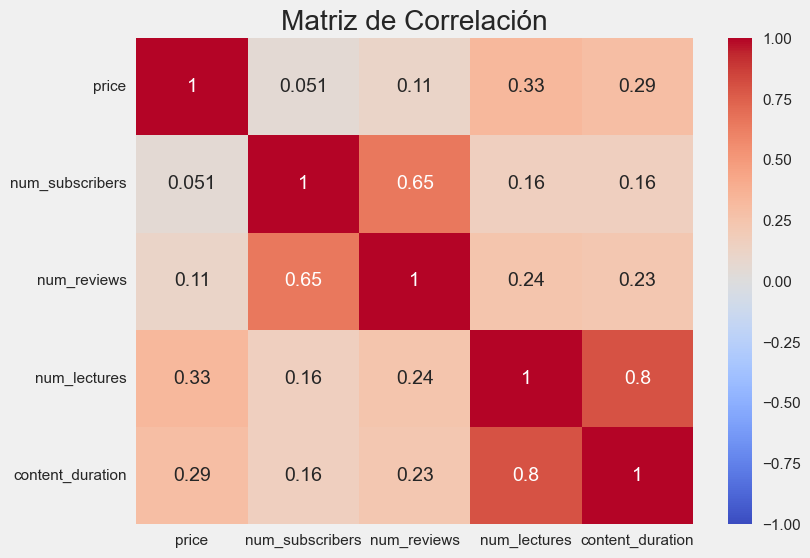

In [72]:

# Visualizar la matriz de correlación
columnas_seleccionadas = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
columnas_data = df[columnas_seleccionadas]

# Calcular la matriz de correlación
correlation_matrix = columnas_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Podemos concluir que:

- Hay una alta correlación entre las variables num_reviews con num_subscribers, la cual tiene mucho sentido pues a más usuarios inscritos mayor probabilidad de reviews se pueden generar, pero no considero optimo descartar una de las 2 variables en caso de hacer una analisis más especifico.
- Hay una correlación aún más fuerte entre num_lectura con content_duration, de forma que que podriamos descartar una de las 2 variables en caso de hacer un analisis más profundo.

## Columnas cualitativas

Comenzaremos analizando el comportamiendo de las variables cualitativas:

In [75]:
df.describe(include= "O") 

,course_title,url,level,published_timestamp,subject
count,3678,3678,3678,3678,3678
unique,3663,3672,4,3672,4
top,Acoustic Blues Guitar Lessons,https://www.udemy.com/cfa-level-2-quantitative-methods/,All Levels,2017-07-02T14:29:35Z,Web Development
freq,3,2,1929,2,1200


De esta revision general podemos observar que en ninguna de las columnas hay datos nulos o faltantes, revisemos cada columna más a fondo:


#### course_title

- Hay 3663 datos unicos, por lo que el resto de datos son datos repetidos

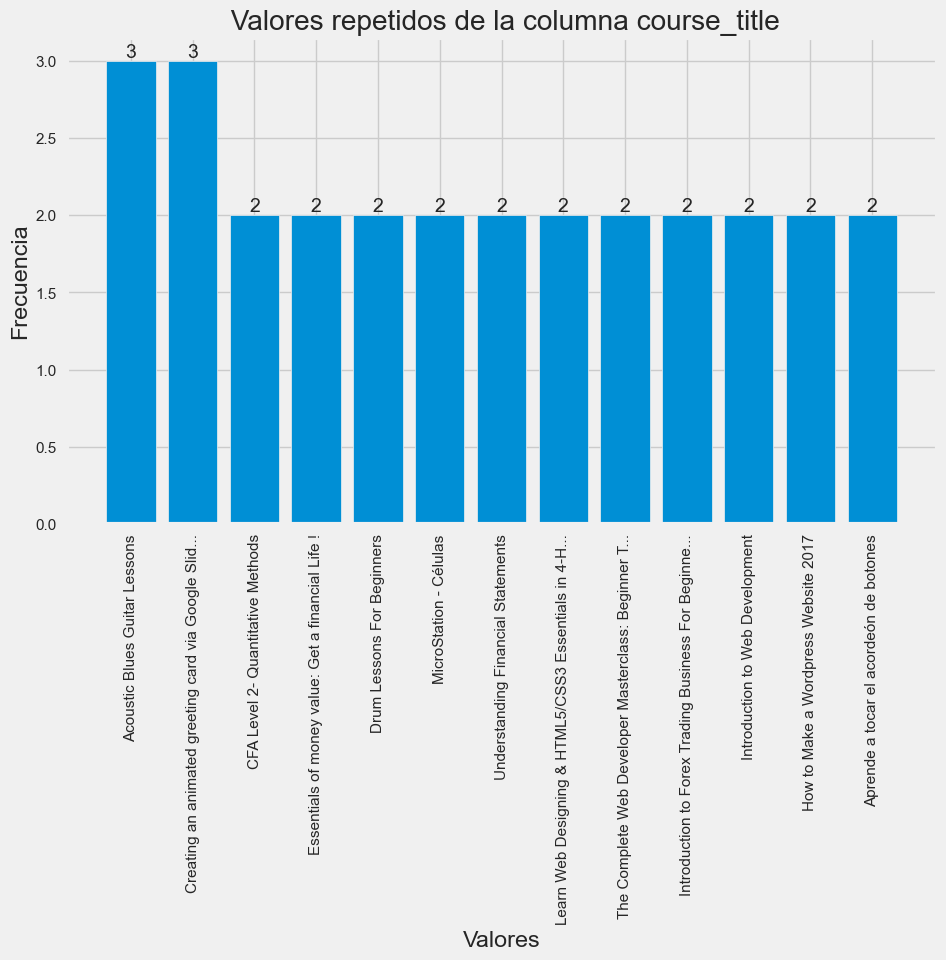

In [76]:
# Filtrar las columnas con valores nulos mayores a cero
frecuencia = df.course_title.value_counts().loc[lambda x: x>1]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(' Valores repetidos de la columna course_title')

#Configurar titulos
titulos = []
for texto in frecuencia.index:
    titulos.append(texto[:50]+"..." if len(texto) > 50 else texto)
# Mostrar el gráfico
plt.xticks(frecuencia.index,titulos,rotation=90)
plt.show()

- Que estos valores esten repetidos puede significar haya errores que deben ser borrados por redundancia o que directamente hayan cursos con el mismo nombre pero con algun paramentro distinto

In [78]:
df[df.course_title.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beginners,https://www.udemy.com/introduction-to-forex-trading-business-for-beginners/,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-statements/,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative-methods/,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1334,699376,Creating an animated greeting card via Google Slides,https://www.udemy.com/creating-an-animated-greeting-card-via-google-slides-2/,True,20,549,10,8,Beginner Level,1.000000,2016-04-12T01:24:14Z,Graphic Design
1447,699380,Creating an animated greeting card via Google Slides,https://www.udemy.com/creating-an-animated-greeting-card-via-google-slides-3/,True,20,770,8,8,Intermediate Level,1.000000,2016-05-06T15:54:32Z,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2067,112314,Acoustic Blues Guitar Lessons,https://www.udemy.com/jim-bruce-blues-guitar-lessons-36-pack/,True,125,1284,136,40,Intermediate Level,12.500000,2013-11-28T08:54:00Z,Musical Instruments
2158,647276,Acoustic Blues Guitar Lessons,https://www.udemy.com/acoustic-blues-guitar-lessons/,True,75,189,18,101,Intermediate Level,4.500000,2016-01-10T21:39:42Z,Musical Instruments
2332,1152334,Aprende a tocar el acordeón de botones,https://www.udemy.com/aprende-a-tocar-el-acordeon-de-botones-i/,True,50,20,6,24,Beginner Level,2.000000,2017-05-17T16:50:41Z,Musical Instruments


- Los de arriba son los valores repetidos de la columna course_title y se puede ver que hay diferencias con sus versiones originales por la url donde están alojados y el momento de publicación (published_timestamp) por lo que no tienen que ser un error estos datos

#### url

- Hay 3672 datos unicos, por lo que hay 6 valores repetidos, que directamente deben de ser un error, esta conclusión está hecha con base a la idea de que cada url debe ser unica al igual que una id, si dos cursos tienen la misma url, implica que son el mismo y no dos. Revisemos qué url aparecen más de 2 veces

In [86]:
# Filtrar las columnas con valores nulos mayores a cero
frecuencia = df.url.value_counts().loc[lambda x: x>1]

df[df['url'].str.contains('|'.join(frecuencia.index))]


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
454,1157298,Introduction to Forex Trading Business For Beginners,https://www.udemy.com/introduction-to-forex-trading-business-for-beginners/,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative-methods/,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
778,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-statements/,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beginners,https://www.udemy.com/introduction-to-forex-trading-business-for-beginners/,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-statements/,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative-methods/,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design


- Y la hipotesis es correcta, son datos duplicados que son completamente iguales entre ellos, lo mejor sería borrarlos para evitar redundancias al momento de hacer analisis más profundos.

#### level

- Solo hay 4 datos unicos, la columna level hace referencia al nivel del curso, si es accesible por todo publico o no. Revisemos la distribución de estos

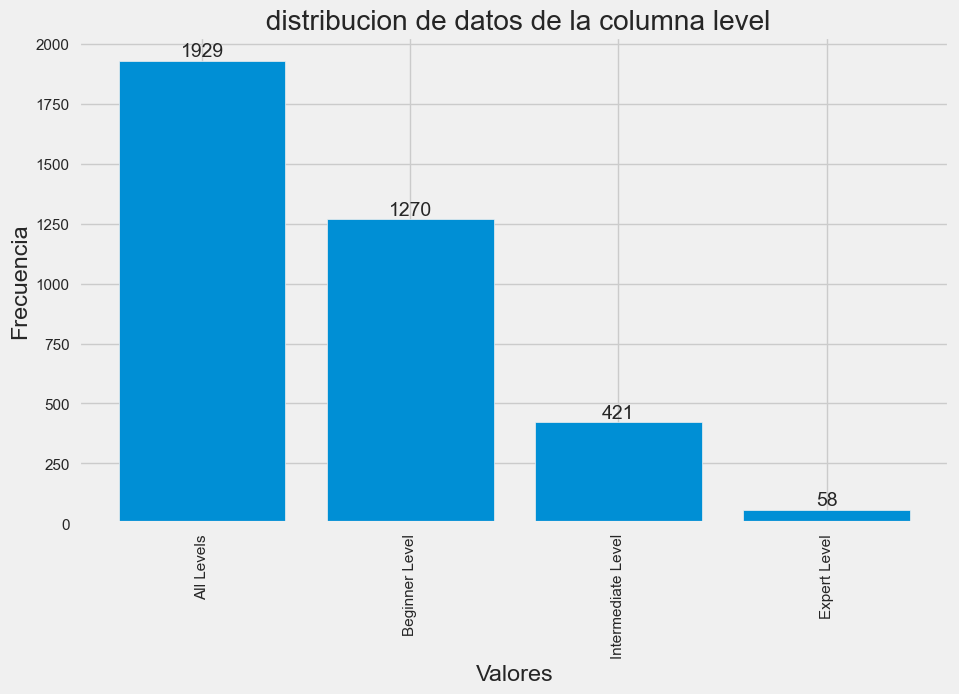

In [87]:
# Filtrar las columnas con valores nulos mayores a cero
frecuencia = df.level.value_counts().loc[lambda x: x>1]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values)

# Agregar etiquetas a las barras
for i, value in enumerate(frecuencia.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(' distribucion de datos de la columna level')

#Configurar titulos
titulos = []
for texto in frecuencia.index:
    titulos.append(texto[:50]+"..." if len(texto) > 50 else texto)
# Mostrar el gráfico
plt.xticks(frecuencia.index,titulos,rotation=90)
plt.show()

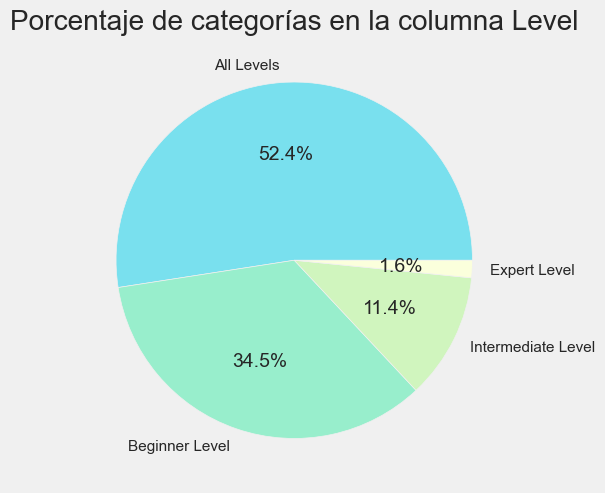

In [91]:
cantidad_datos_reviews = frecuencia 
values = [cantidad_datos_reviews.values[0],cantidad_datos_reviews.values[1],cantidad_datos_reviews.values[2],cantidad_datos_reviews.values[3]  ]
labels = [cantidad_datos_reviews.index[0], cantidad_datos_reviews.index[1],cantidad_datos_reviews.index[2],cantidad_datos_reviews.index[3]]
colors = ['#79E0EE','#98EECC', '#D0F5BE','#FBFFDC']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de categorías en la columna Level')

plt.show()

- Podemos concluir que es predominante el valor de "all levels" lo que implica que hay muchos más cursos para todo el publico que para especializados

#### published_timestamp

- Los datos repetidos de esta columna, son los mismos que están repetidos en la url, por lo que las conclusiones en url, también sirven para esta columna.

#### subject